In [15]:
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import copy

import dijkstra as dijk
import stacked_graph as sg
import testing as test
import graph_visualization as gv

# 1

In [2]:

# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
# with open(read_json_path)  as json_file:
#     raw_json = json.load(json_file) # returns json file as dict

# graph = sg.StackedGraph(raw_json=raw_json)

# subgraphs = list(dijk.graph_partition(graph))
# dijk.select_nodes(graph, subgraphs)


In [3]:
# groups = list(graph.get_node_groups(asap = False))
# print(test.group_validate(graph, groups))
# for group in groups:
#     print(group)


In [4]:
# n_graphs = len(groups)
# n_cols = 6  # Number of columns for the grid
# n_rows = (n_graphs + n_cols - 1) // n_cols  # Calculate the number of rows needed

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
# axes = axes.flatten()  # Flatten the array of axes


# for i in range(len(groups)):
#     if i >= 0:
#         test_group = groups[i]

#         start_stack = sg.StackedNode(0, [], [[]], [[]], opp='start', func_stack=['start'], cost_stack=[0])
#         first_stack = copy.deepcopy(graph.stack_list[graph.id_to_idx[test_group[0]]])
#         first_stack.parents = [0]

#         subgraph_stack_list = [start_stack, first_stack]
#         for stack_id in test_group[1:]:
#             stack = graph.stack_list[graph.id_to_idx[stack_id]]
#             new_node = copy.deepcopy(stack)
#             new_node.parents = set(new_node.parents) - graph.in_nodes
#             subgraph_stack_list.append(new_node)


#         new_graph = sg.StackedGraph(stack_list=subgraph_stack_list)
#         # gv.adj_to_graph(new_graph.adj_matrix, save=False, layout = 'spectral')
#         # gv.adj_to_graph(new_graph, save=False, layout = 'kk', title = f'Subgraph {i}')
#         gv.adj_to_graph(new_graph, ax=axes[i], layout='kk', title=f'Subgraph {i+1}')


# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])


# plt.tight_layout()
# plt.show()


# 2 Graph Visualization

In [5]:
subgraph_to_plot = 3


read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
with open(read_json_path)  as json_file:
    raw_json = json.load(json_file) # returns json file as dict

graph = sg.StackGraph(raw_json=raw_json)
stacked_subgraphs = list(dijk.graph_partition(graph))
flat_subgraphs = dijk.select_nodes(stacked_subgraphs)
expanded_flat_subgraphs = dijk.expand_nodes(flat_subgraphs)
print(len(expanded_flat_subgraphs))

stacked_subgraphs = list(dijk.graph_partition(graph))
flat_subgraphs = dijk.select_nodes(stacked_subgraphs)
expanded_flat_subgraphs = dijk.expand_nodes(flat_subgraphs)


... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Subgraphs Made ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes

In [6]:
def draw_subgraphs(subgraph, sub = False):
    fig, ax = plt.subplots(figsize=(10, 10))

    gv.adj_to_graph(subgraph, ax=ax, layout='kk', title=f'Subgraph')
    # plt.tight_layout()
    plt.show()

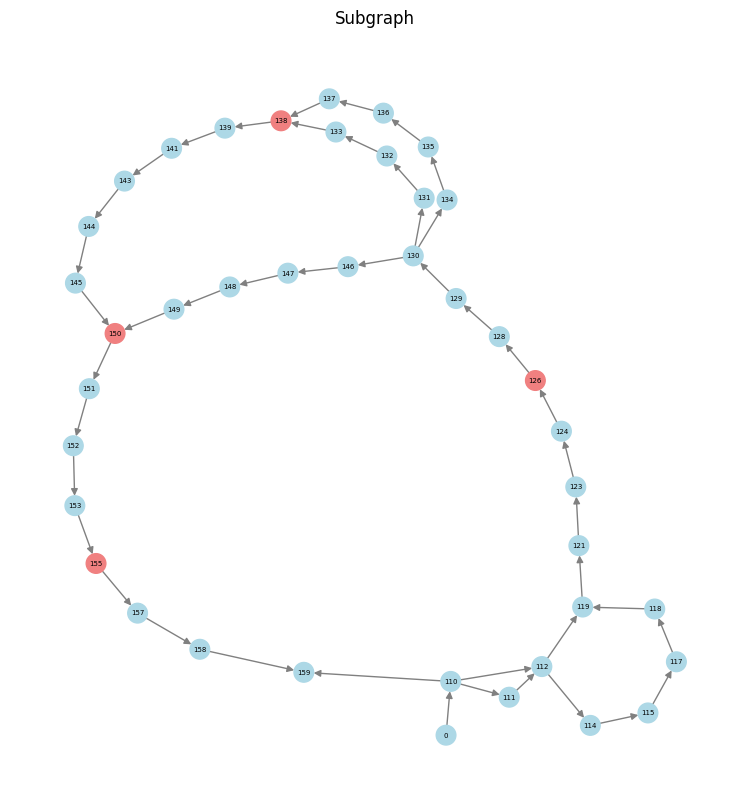

In [7]:
draw_subgraphs(flat_subgraphs[subgraph_to_plot])


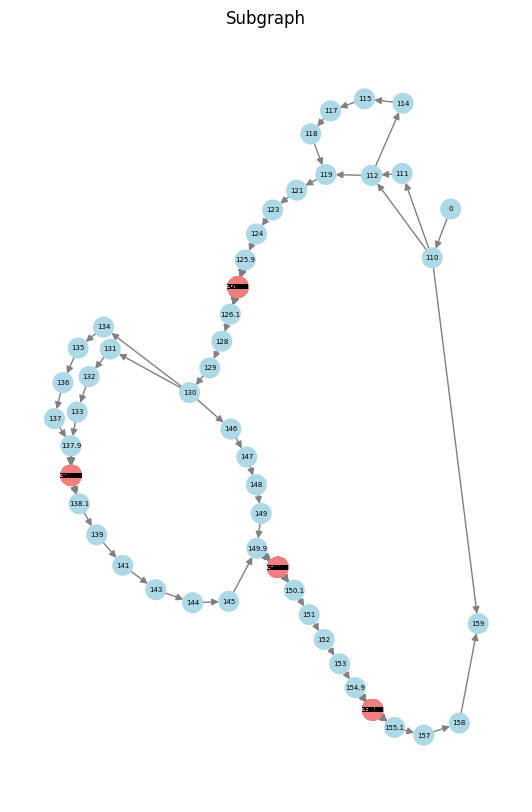

In [8]:
# draw_subgraphs(graph)
# draw_subgraphs(graph)
draw_subgraphs(expanded_flat_subgraphs[subgraph_to_plot])
# draw_subgraphs(graph, sub='all')

# 3 Timeline Visualization

In [17]:
read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
with open(read_json_path)  as json_file:
    raw_json = json.load(json_file) # returns json file as dict

graph = sg.StackGraph(raw_json=raw_json)
stacked_subgraphs = list(dijk.graph_partition(graph))
flat_subgraphs = dijk.select_nodes(stacked_subgraphs)
expanded_flat_subgraphs = dijk.expand_nodes(flat_subgraphs)
scheduled_flat_graph, end_time, break_points = dijk.schdeule_nodes(
    graph, expanded_flat_subgraphs
)
print(end_time)


hardware = set()
for node in scheduled_flat_graph.node_list:
    # if stack.hardware_selection is None:
    #     print(stack)
    hardware.add(node.hardware_selection)
    assert node.hardware_selection is not None
print(hardware)
print(len(scheduled_flat_graph.node_list))

break_points.sort()
# gv.make_schedule_diagram(scheduled_flat_graph, xlim_start=None, xlim_end=None)
# gv.make_schedule_diagram(graph, xlim_start=0, xlim_end=0.1)

# PLOT EACH SUBSECTION
for i in range(len(break_points)-1):
    print(i)
    print(f'{break_points[i]} - {break_points[i+1]}')
    # gv.make_schedule_diagram(scheduled_flat_graph, xlim_start=break_points[i], xlim_end=break_points[i+1])
    gv.make_schedule_diagram(scheduled_flat_graph, xlim_start=break_points[i] + 0.00021, xlim_end=break_points[i+1] - 0.00027)


print(f'{end_time=}')
# make_schedule_diagram(graph, xlim_start=0, xlim_end=0.01)


... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Subgraphs Made ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...


KeyboardInterrupt: 

# 4 Memory Visualization

In [18]:
JSON_PATH = "/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json"
# JSON_PATH = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# JSON_PATH = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# JSON_PATH = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
with open(JSON_PATH, encoding="utf-8") as json_file:
    raw_json = json.load(json_file)  # returns json file as dict
    print("... Json loaded ...")

graph = sg.StackGraph(raw_json=raw_json)
stacked_subgraphs = list(dijk.graph_partition(graph))
flat_subgraphs = dijk.select_nodes(stacked_subgraphs)
expanded_flat_subgraphs = dijk.expand_nodes(flat_subgraphs)
scheduled_flat_graph, end_time, break_points = dijk.schdeule_nodes(graph, expanded_flat_subgraphs)
print(end_time)
schedule_df = scheduled_flat_graph.create_schedule_data(write=True)
dram, delta_dram, sram, delta_sram = dijk.get_memory_profile(scheduled_flat_graph)

... Json loaded ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Graph Made ...
... Subgraphs Made ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...     ... Subgraph Nodes selected ...
...   

In [19]:
def plot_time_data(dram, sram, x_limit=None, log=False):
    dram_t, dram_v = zip(*dram)
    sram_t, sram_v = zip(*sram)

    plt.figure(figsize=(30, 5))  # Optional: Adjust figure size

    # plt.plot(dram_t, dram_v, linestyle='-', color='b', label='DRAM')
    # plt.plot(sram_t, sram_v, linestyle='--', color='r', label='SRAM')

    plt.scatter(sram_t, sram_v, color='r', label='SRAM')
    plt.scatter(dram_t, dram_v, color='b', label='DRAM')

    plt.xlabel('Time')
    plt.ylabel('Bits')
    plt.title('Memory')
    plt.legend()

    if x_limit:
        plt.xlim(x_limit)
        # Calculate y-axis limits based on the visible data range
        visible_dram_v = [v for t, v in dram if x_limit[0] <= t <= x_limit[1]]
        visible_sram_v = [v for t, v in sram if x_limit[0] <= t <= x_limit[1]]
        min_y = min(min(visible_dram_v), min(visible_sram_v))
        max_y = max(max(visible_dram_v), max(visible_sram_v))
        plt.ylim(min_y, max_y)

    if log:
        plt.yscale('symlog')

    plt.grid(True)
    plt.tight_layout()

    plt.show()

def subplot_time_data(dram, sram, x_limit=None, log=False):
    dram_t, dram_v = zip(*dram)
    sram_t, sram_v = zip(*sram)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 10), sharex=True)  # Create two subplots, sharing x-axis

    ax1.scatter(dram_t, dram_v, color='b', label='DRAM')  # Plot DRAM on the first subplot
    ax1.set_ylabel('Bits')
    ax1.set_title('Memory')
    ax1.legend()
    ax1.grid(True)

    ax2.scatter(sram_t, sram_v, color='r', label='SRAM')  # Plot SRAM on the second subplot
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Bits')
    ax2.legend()
    ax2.grid(True)

    if x_limit:
        ax1.set_xlim(x_limit)
        ax2.set_xlim(x_limit)

        # Calculate y-axis limits based on the visible data range
        visible_dram_v = [v for t, v in dram if x_limit[0] <= t <= x_limit[1]]
        visible_sram_v = [v for t, v in sram if x_limit[0] <= t <= x_limit[1]]
        min_y1 = min(visible_dram_v)
        max_y1 = max(visible_dram_v)
        min_y2 = min(visible_sram_v)
        max_y2 = max(visible_sram_v)

        ax1.set_ylim(min_y1, max_y1)
        ax2.set_ylim(min_y2, max_y2)

    if log:
        ax1.set_yscale('symlog')
        ax2.set_yscale('symlog')

    plt.tight_layout()
    plt.show()


312
61608


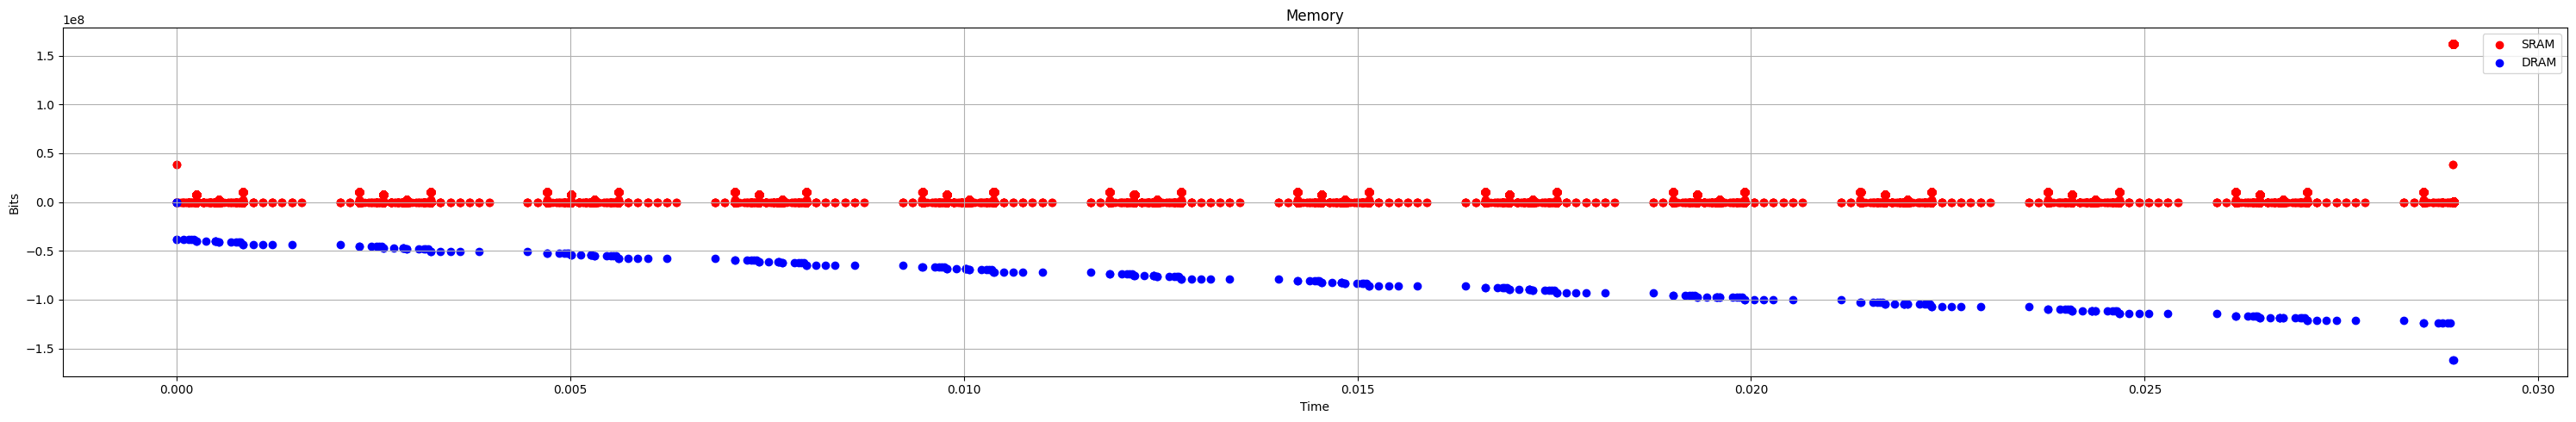

In [20]:
print(len(dram))
print(len(sram))

for i in sram:
    assert i[0] >= 0
    assert i[1] >= 0

plot_time_data(dram, sram)

# print(len(delta_dram))
# print(len(delta_sram))
# plot_time_data(delta_dram, delta_sram)


1.3000000000000003e-07 - 0.0005994023999999998


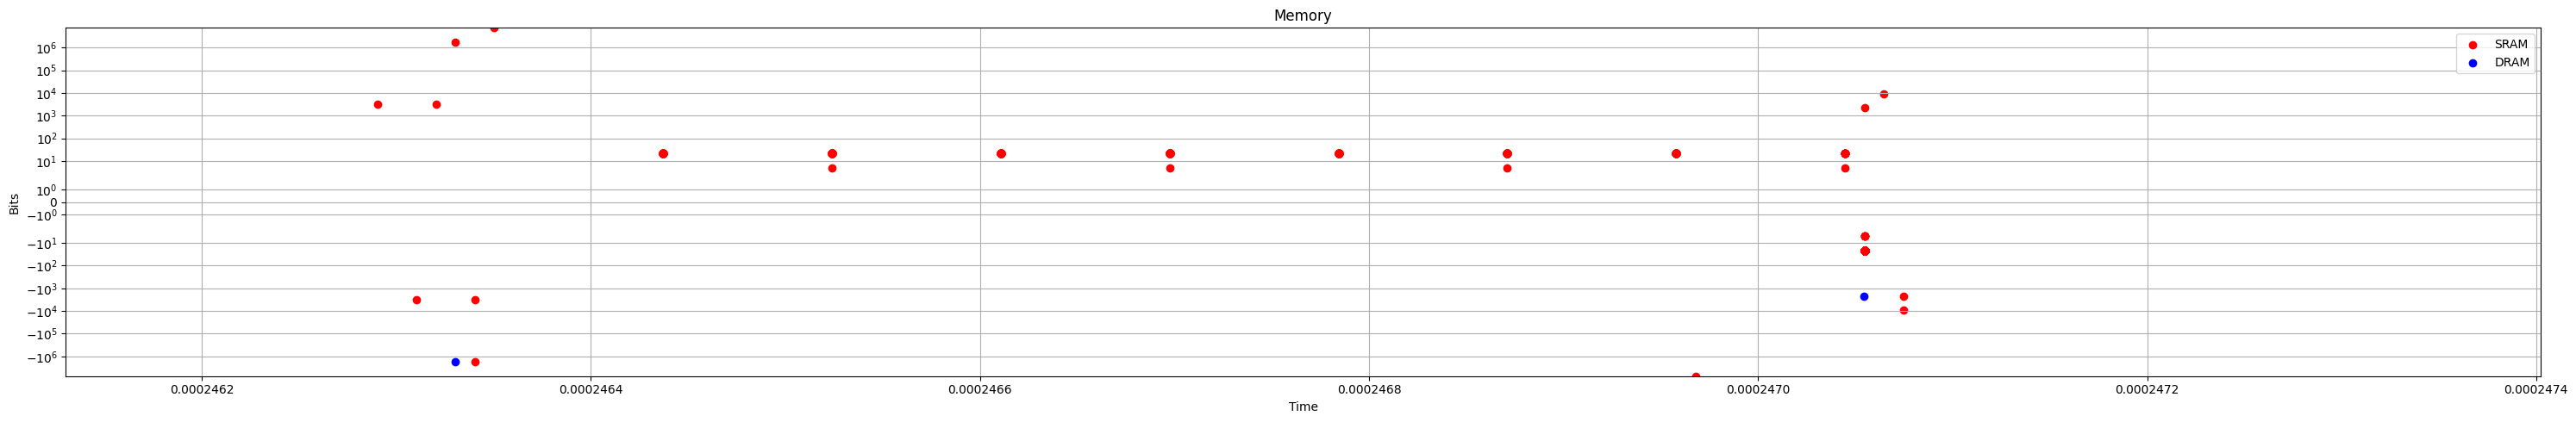

(30817, 4)


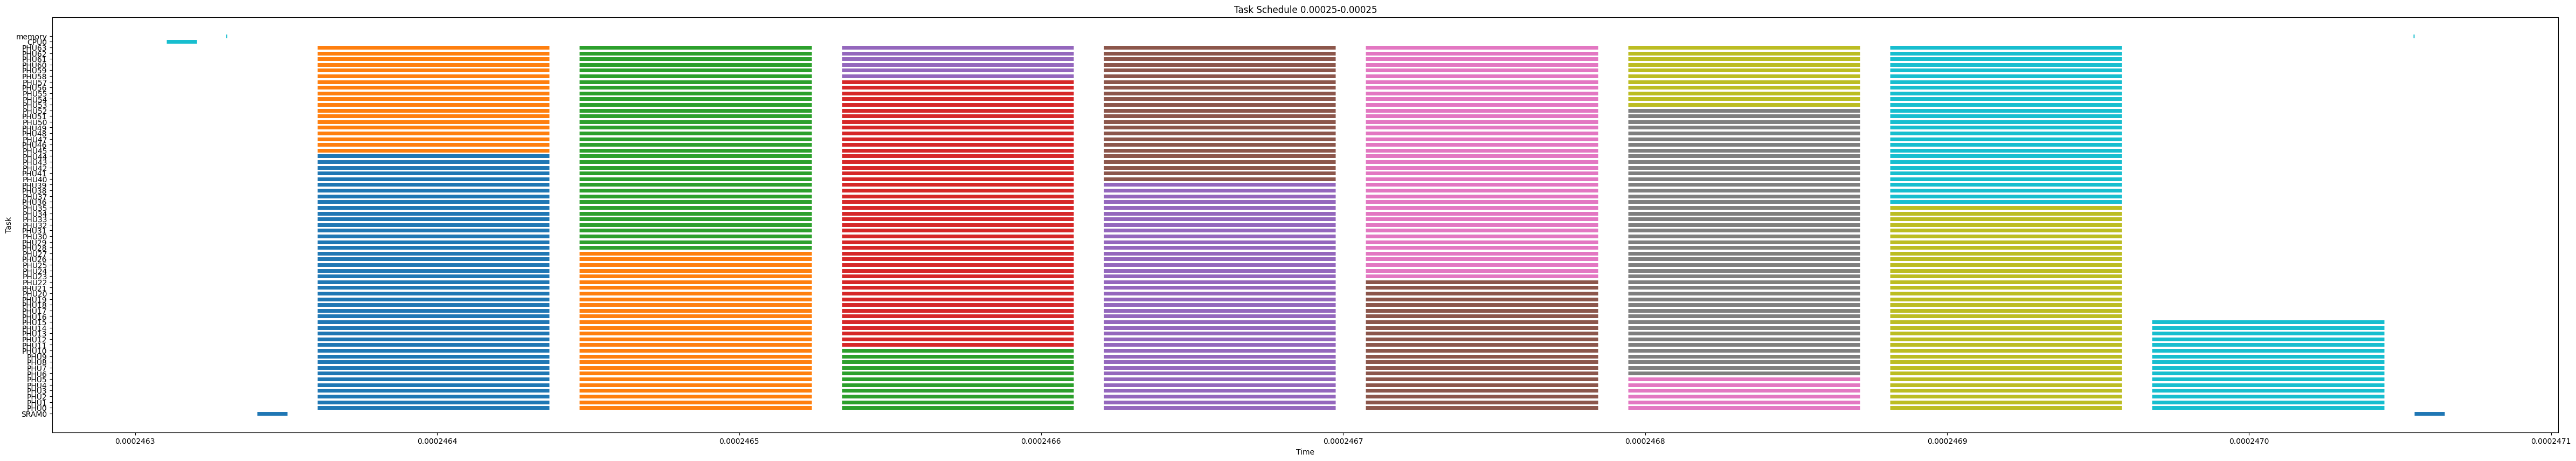

0.0005994023999999998 - 0.002383722


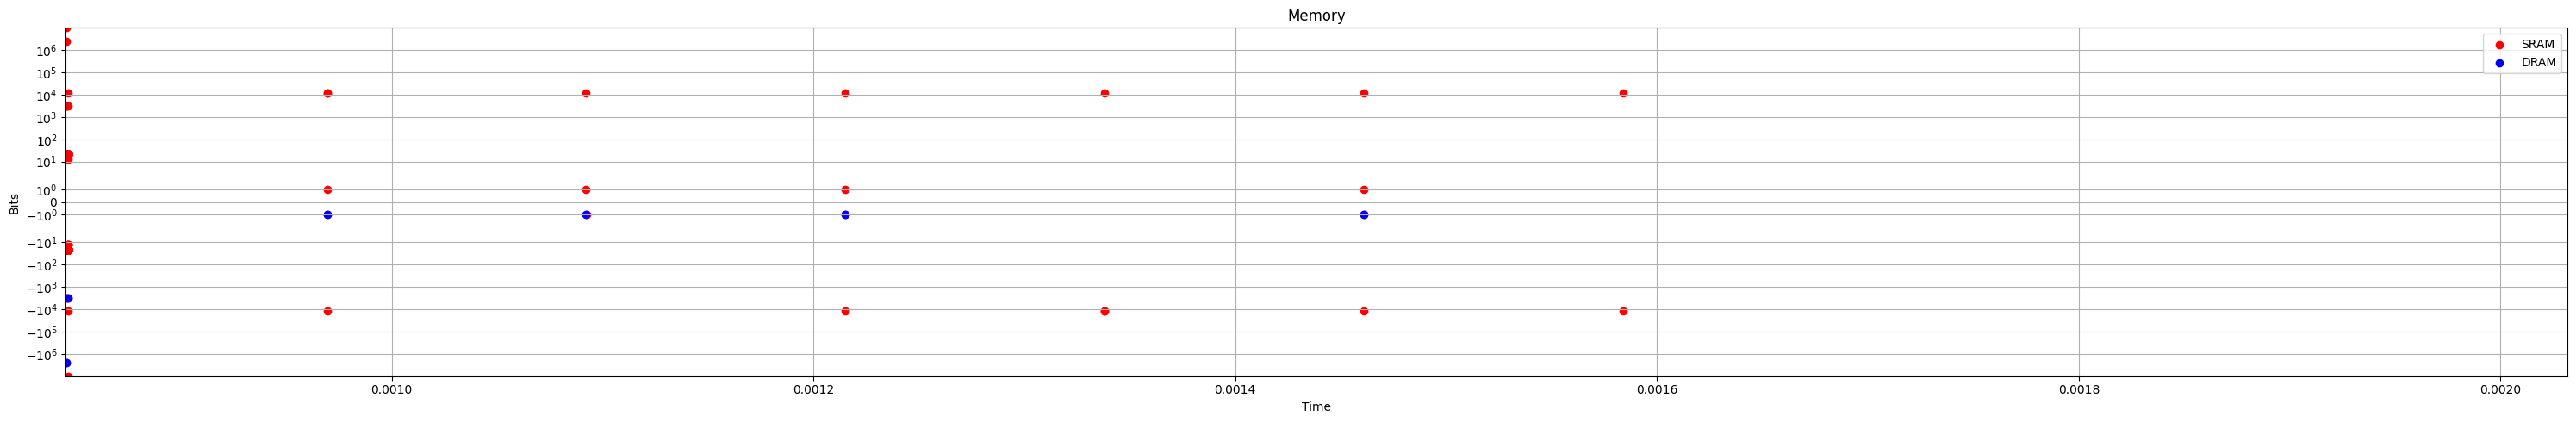

(30817, 4)


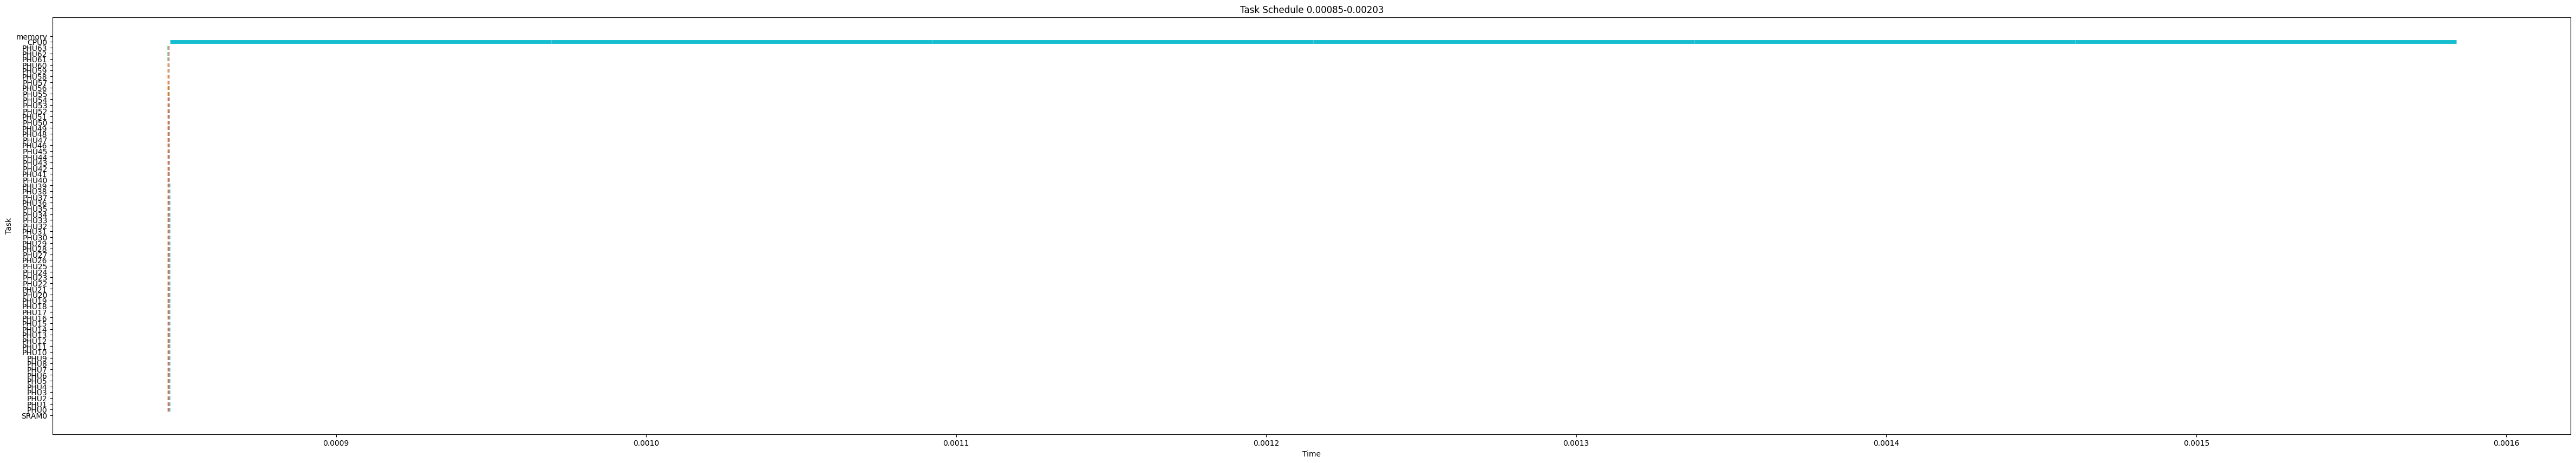

0.002383722 - 0.0029829343999999993


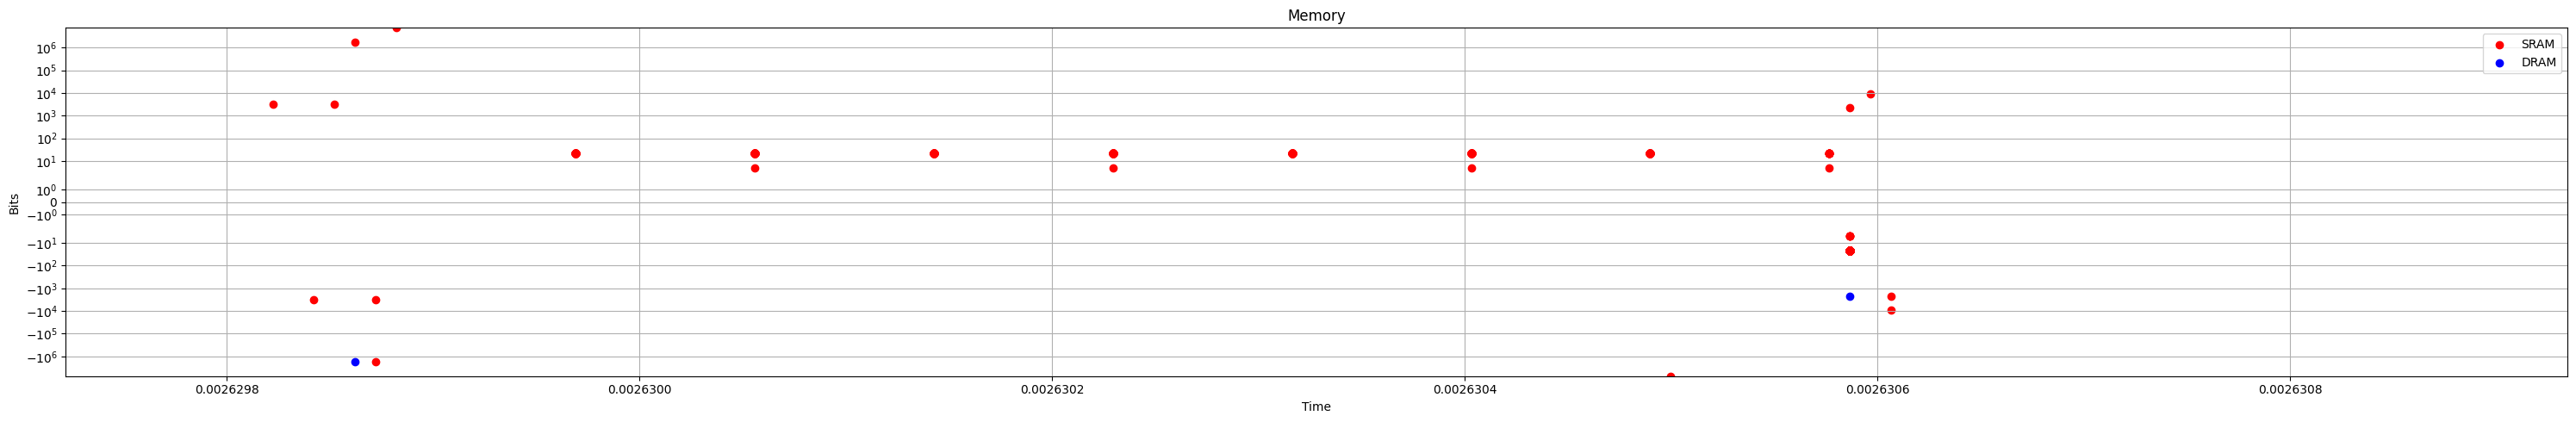

(30817, 4)


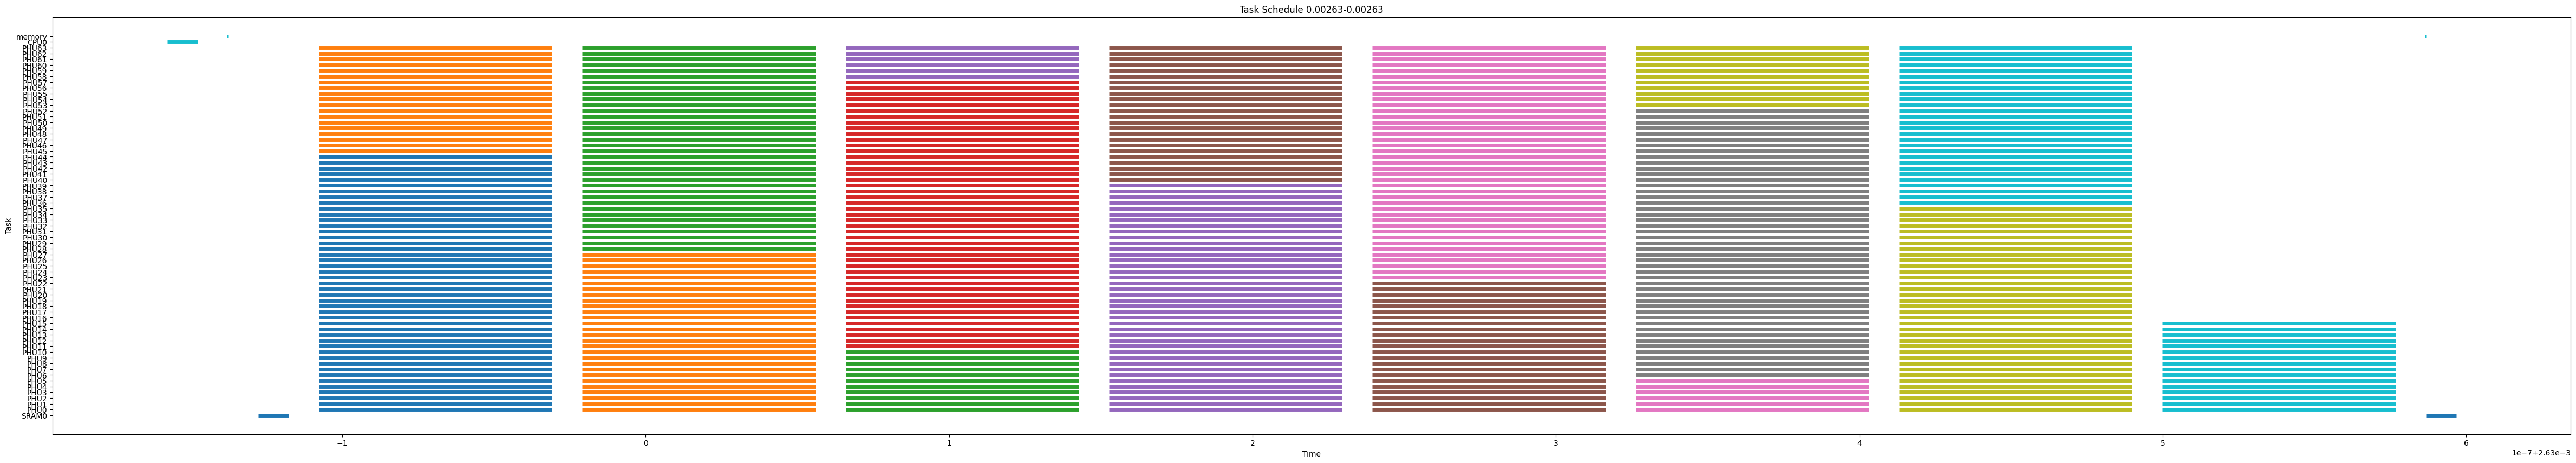

0.0029829343999999993 - 0.004767253999999998


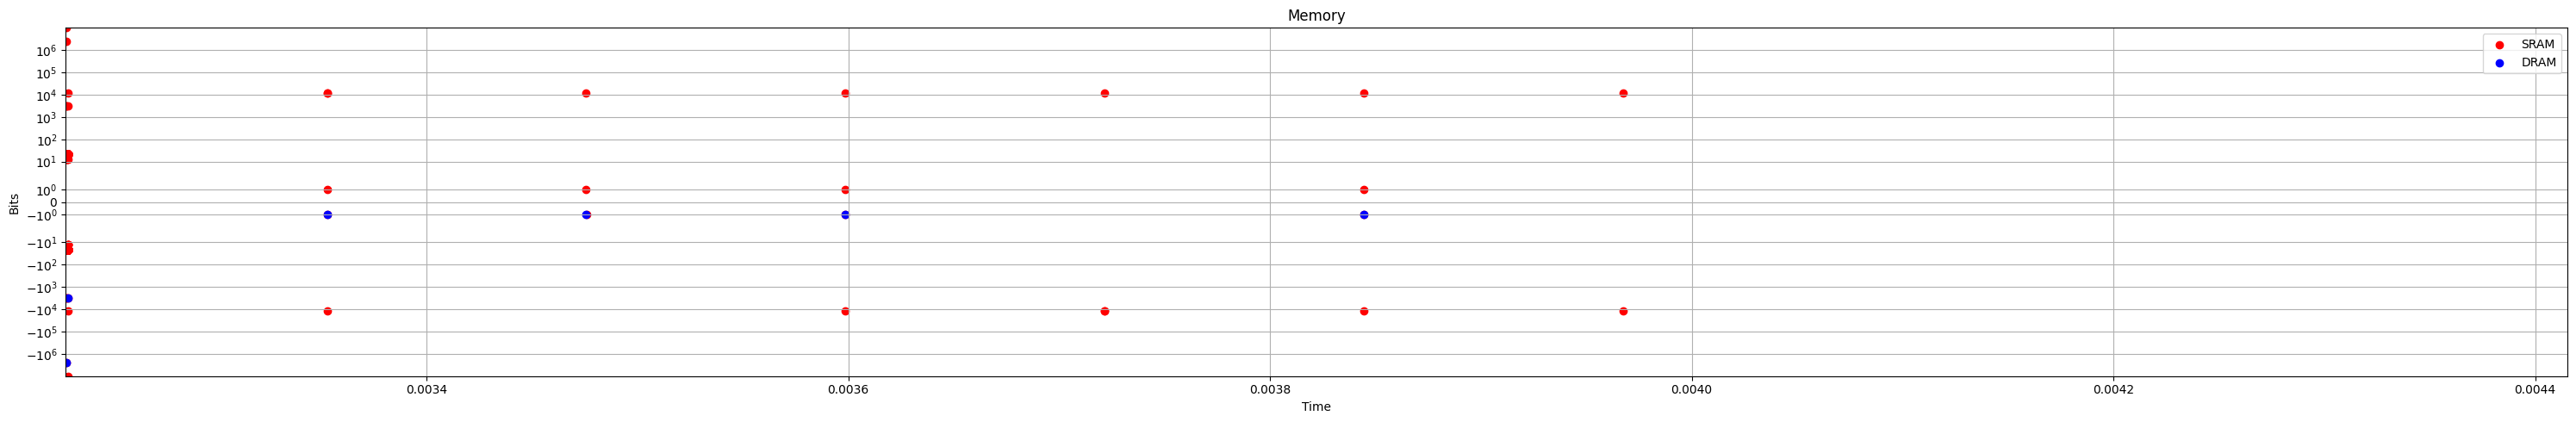

(30817, 4)


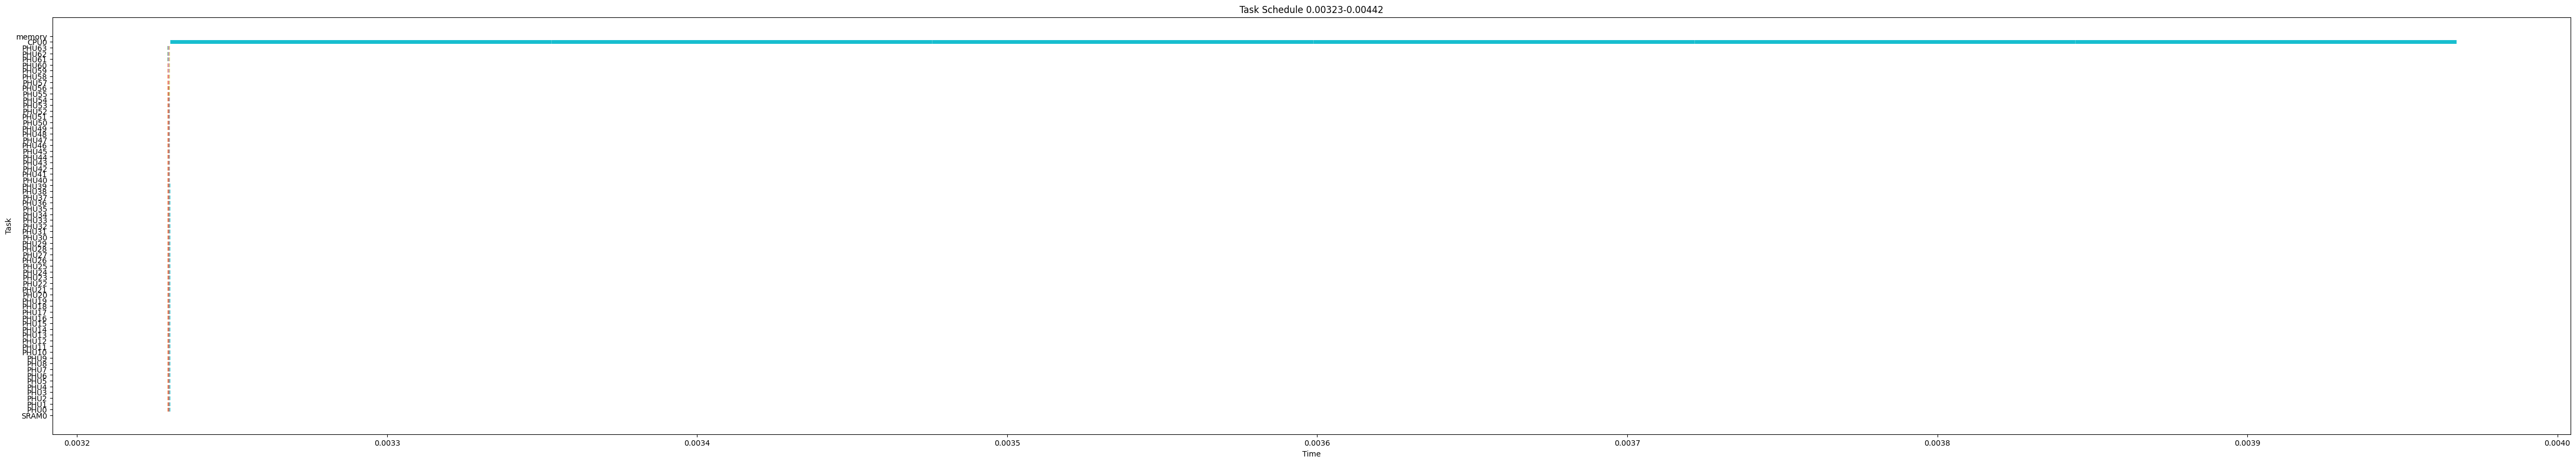

0.004767253999999998 - 0.00536646639999999


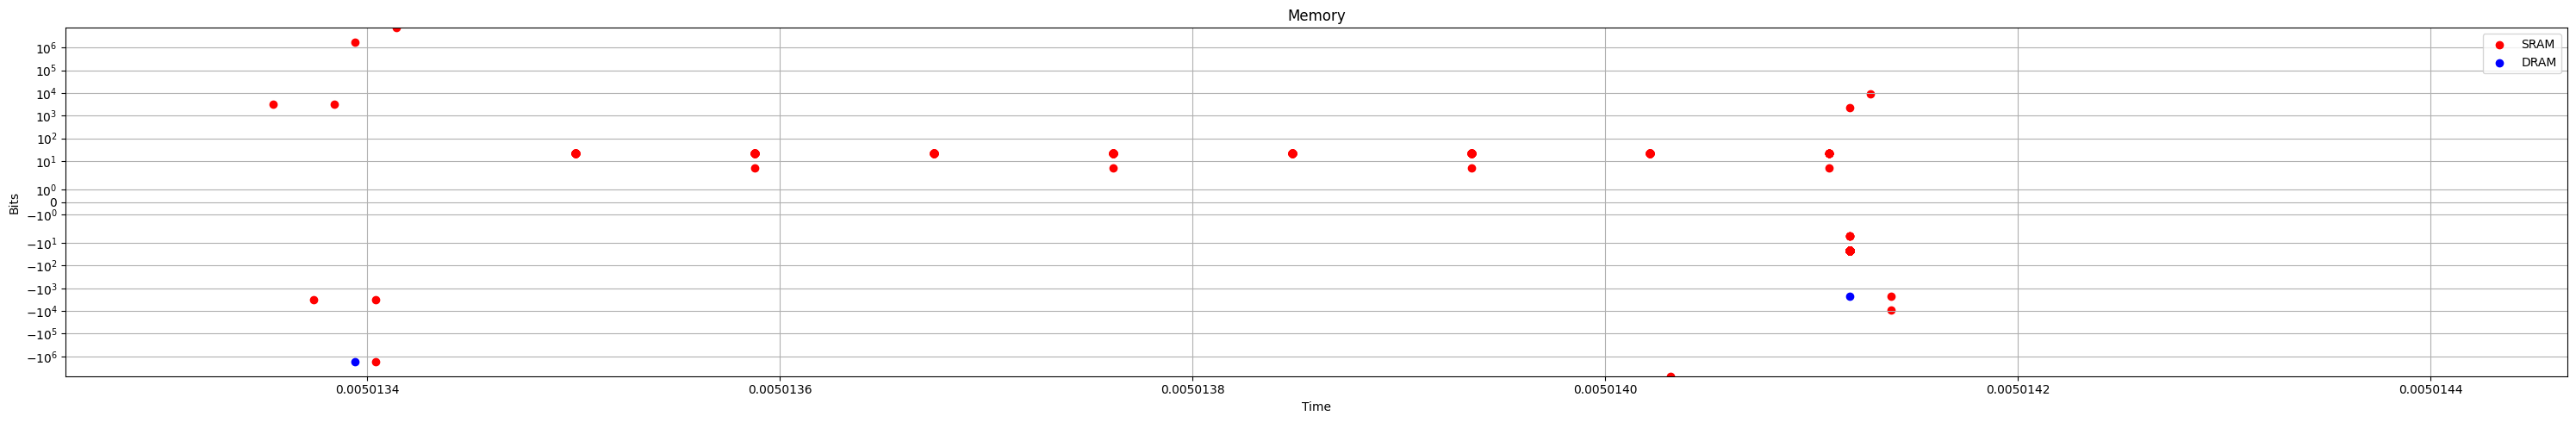

(30817, 4)


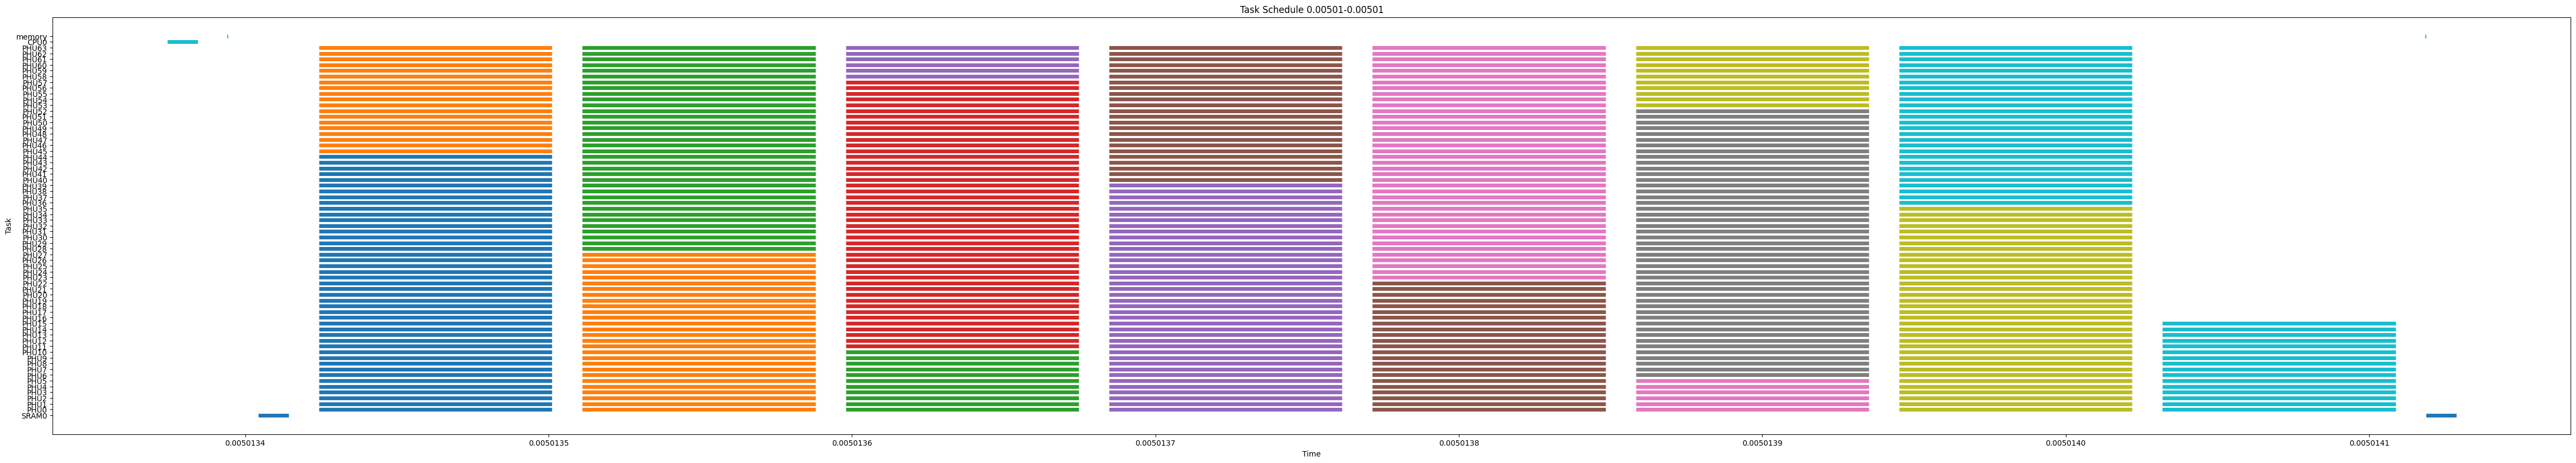

0.00536646639999999 - 0.007150785999999983


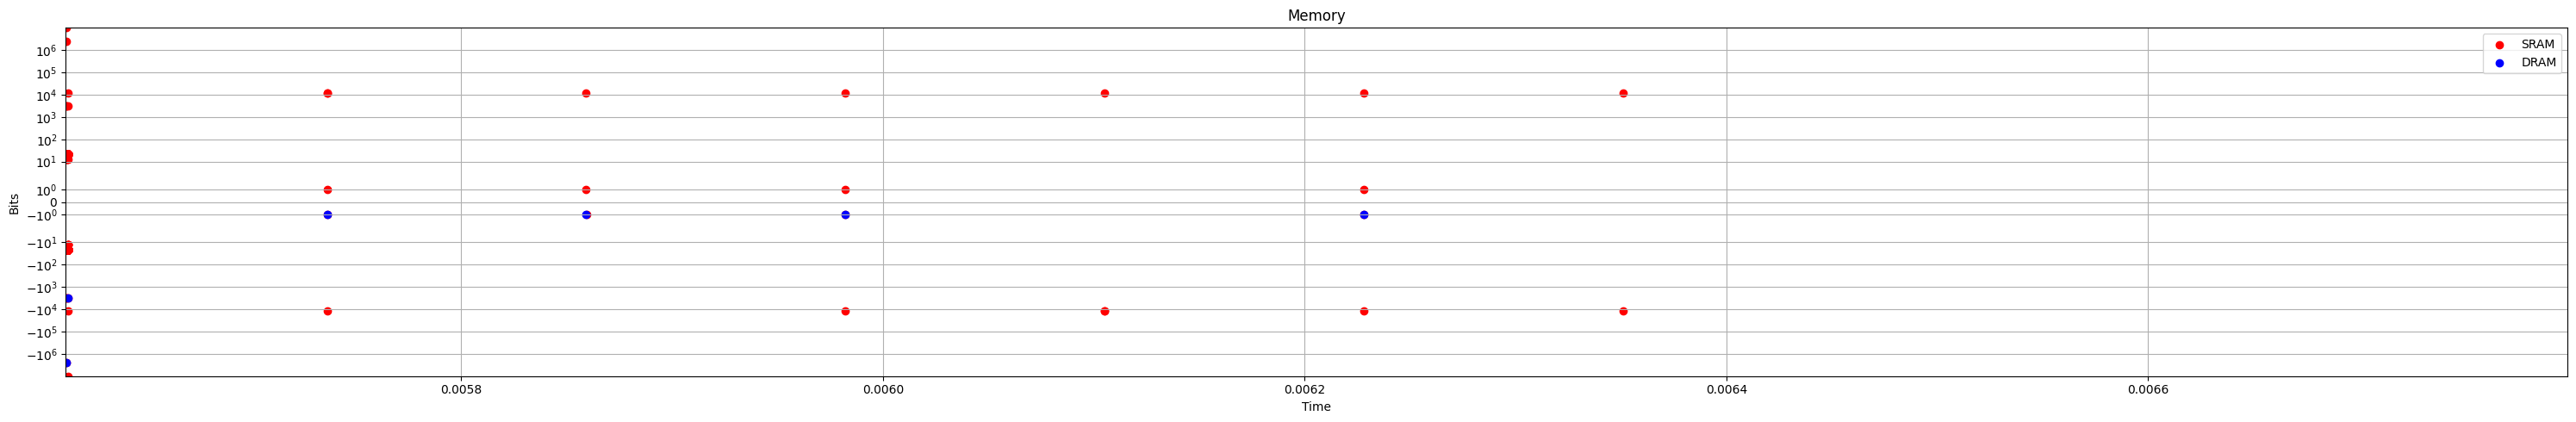

(30817, 4)


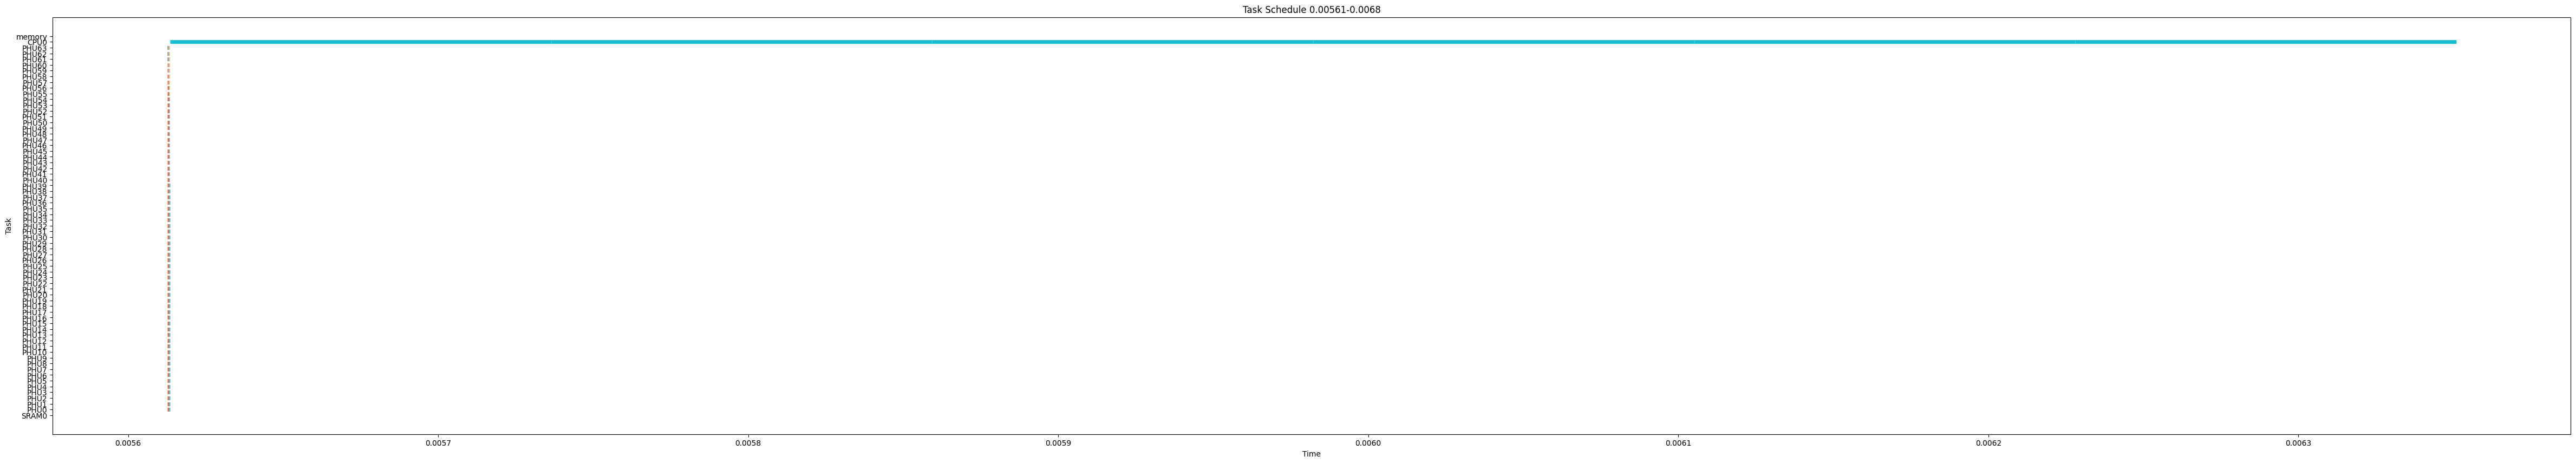

0.007150785999999983 - 0.007749998399999975


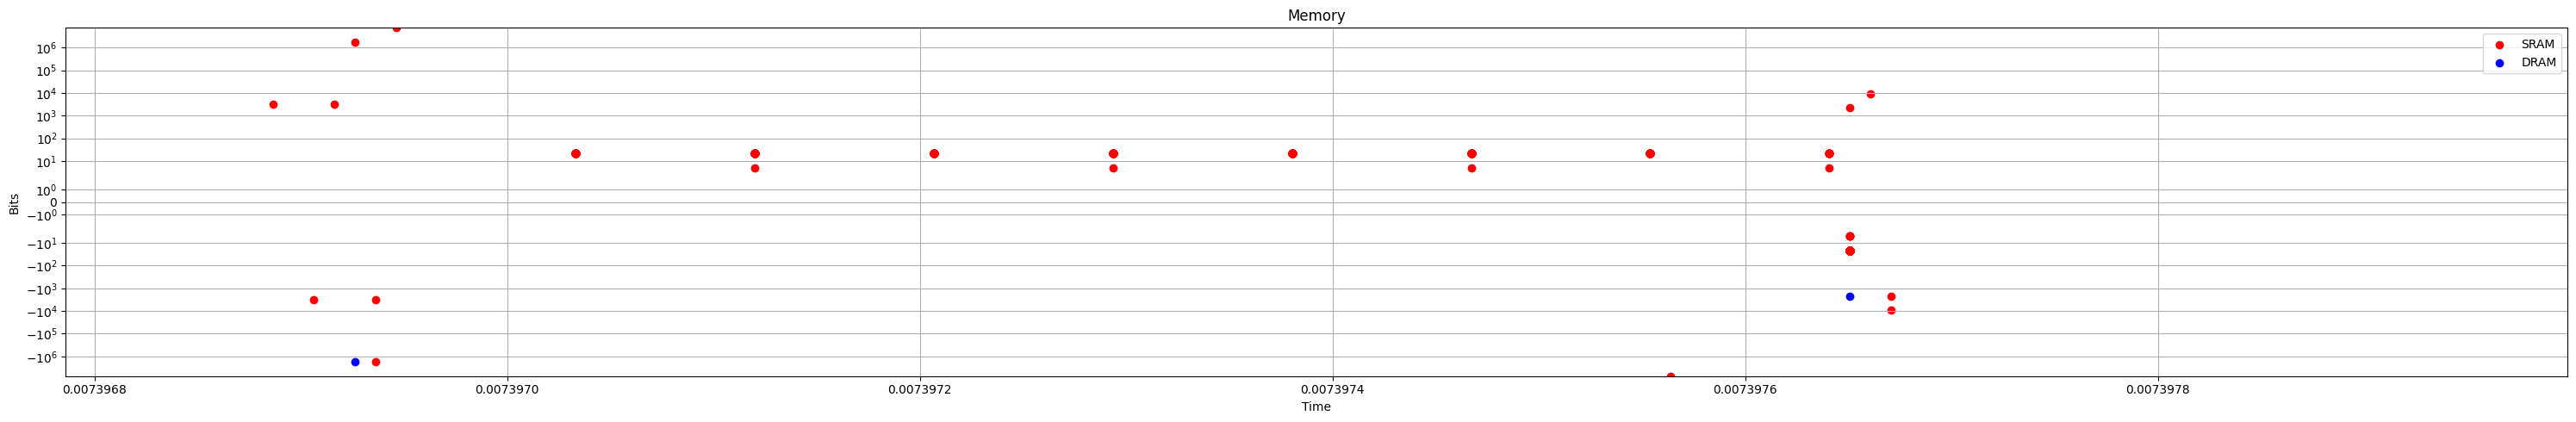

(30817, 4)


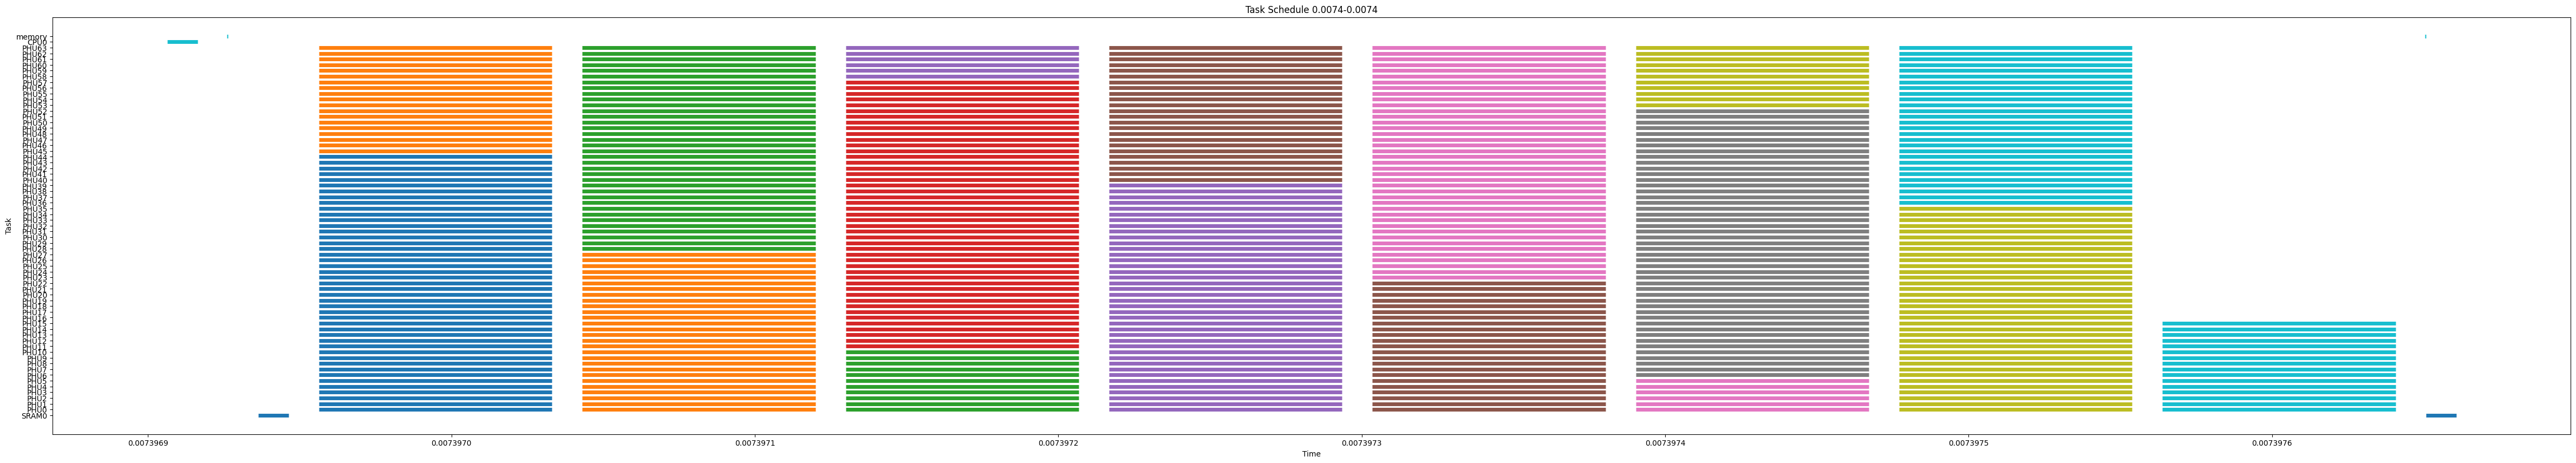

0.007749998399999975 - 0.009534317999999977


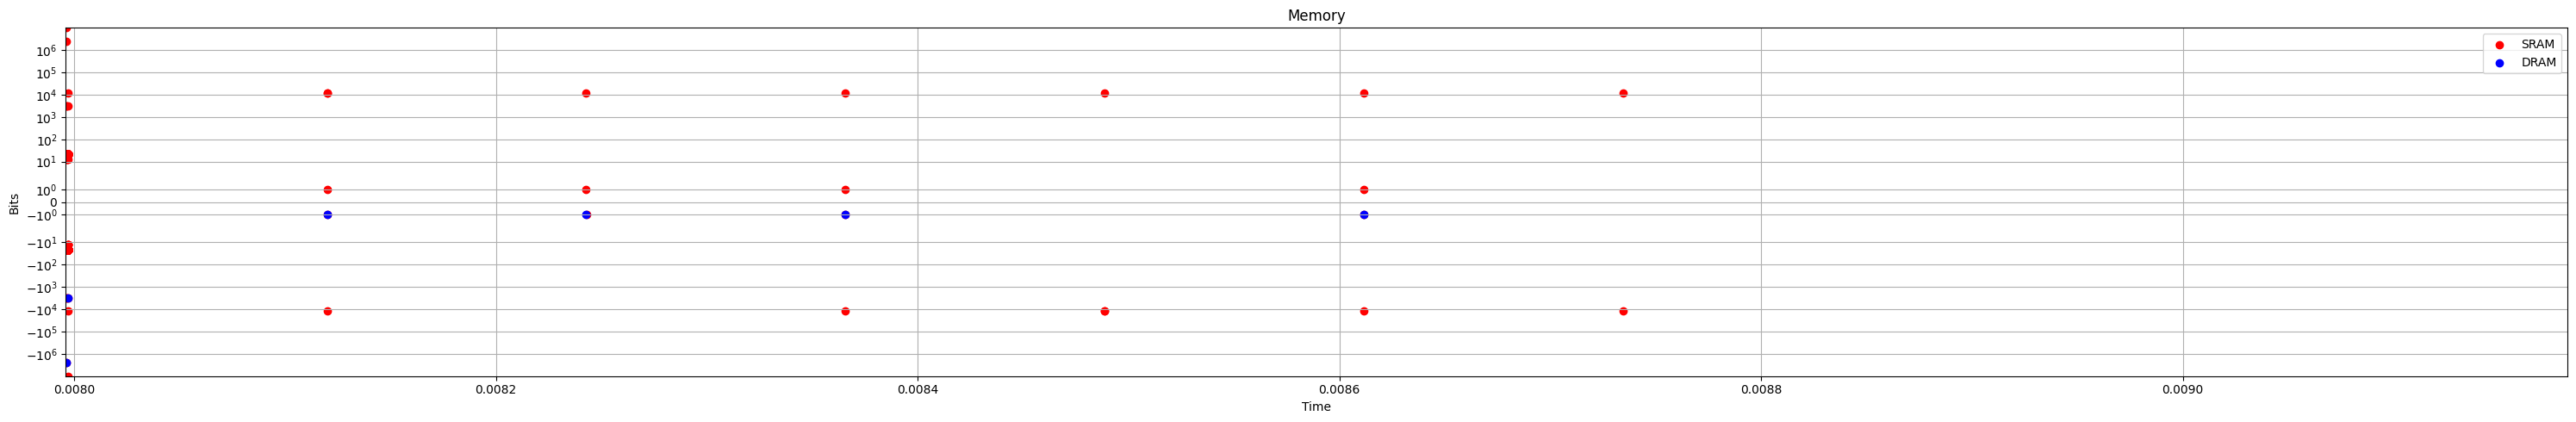

(30817, 4)


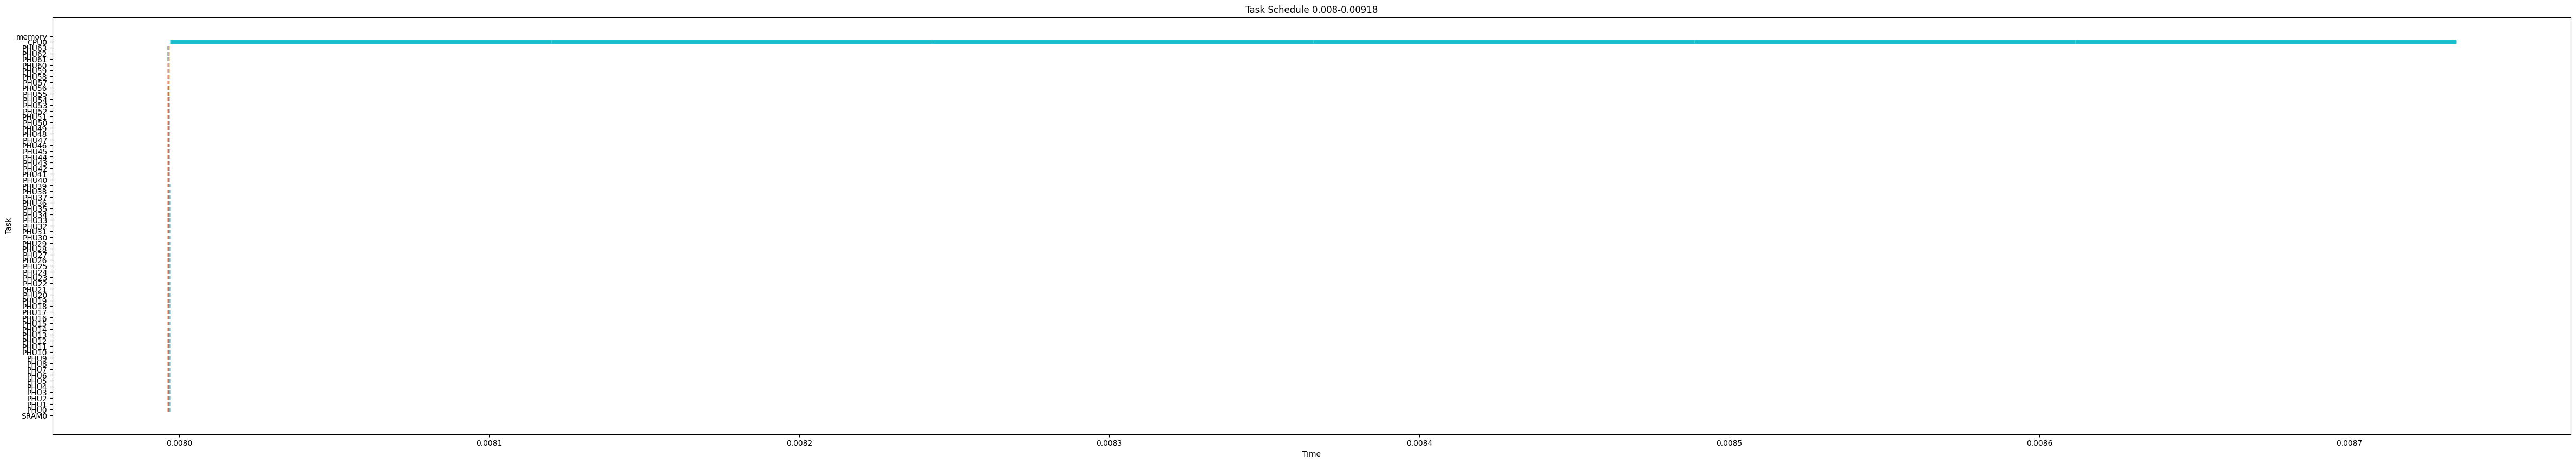

0.009534317999999977 - 0.01013353039999997


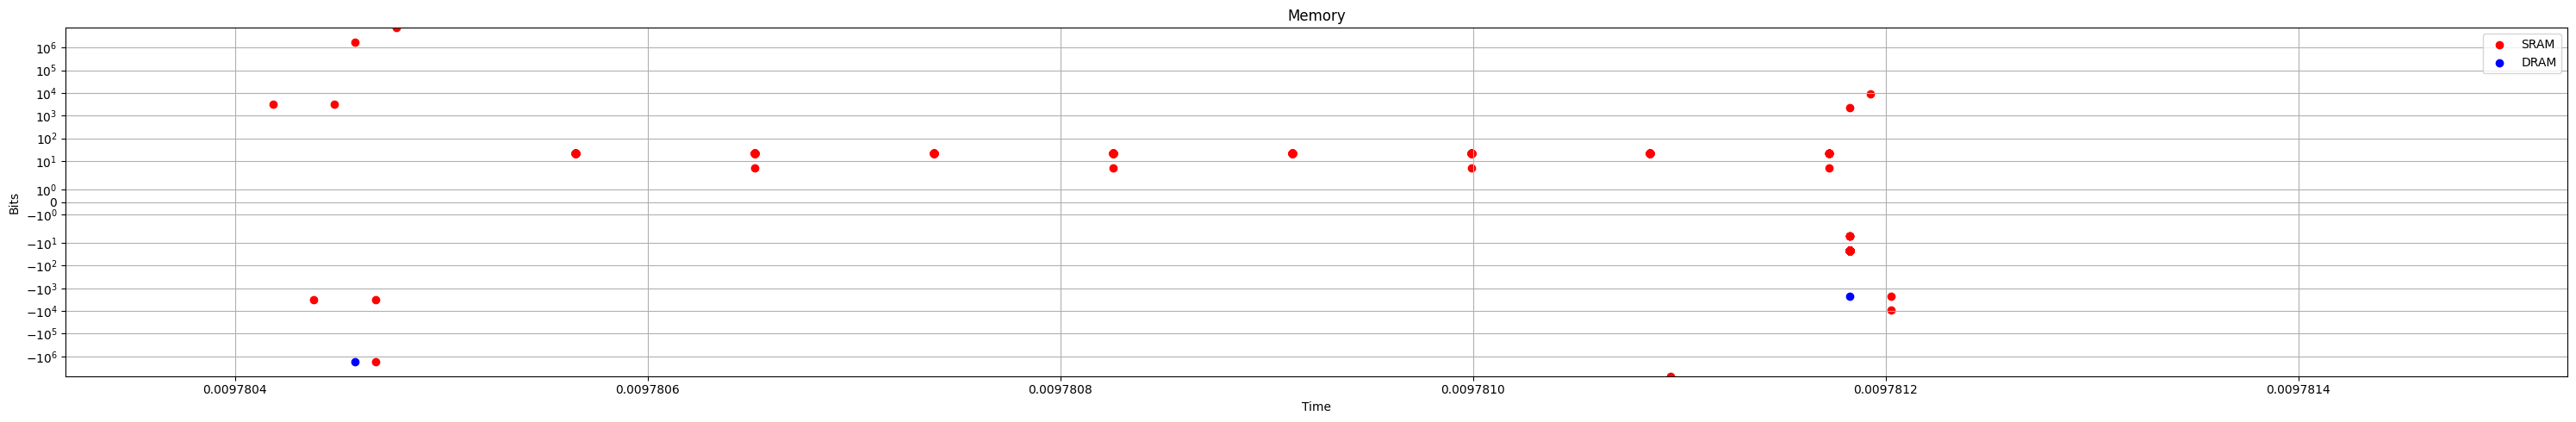

(30817, 4)


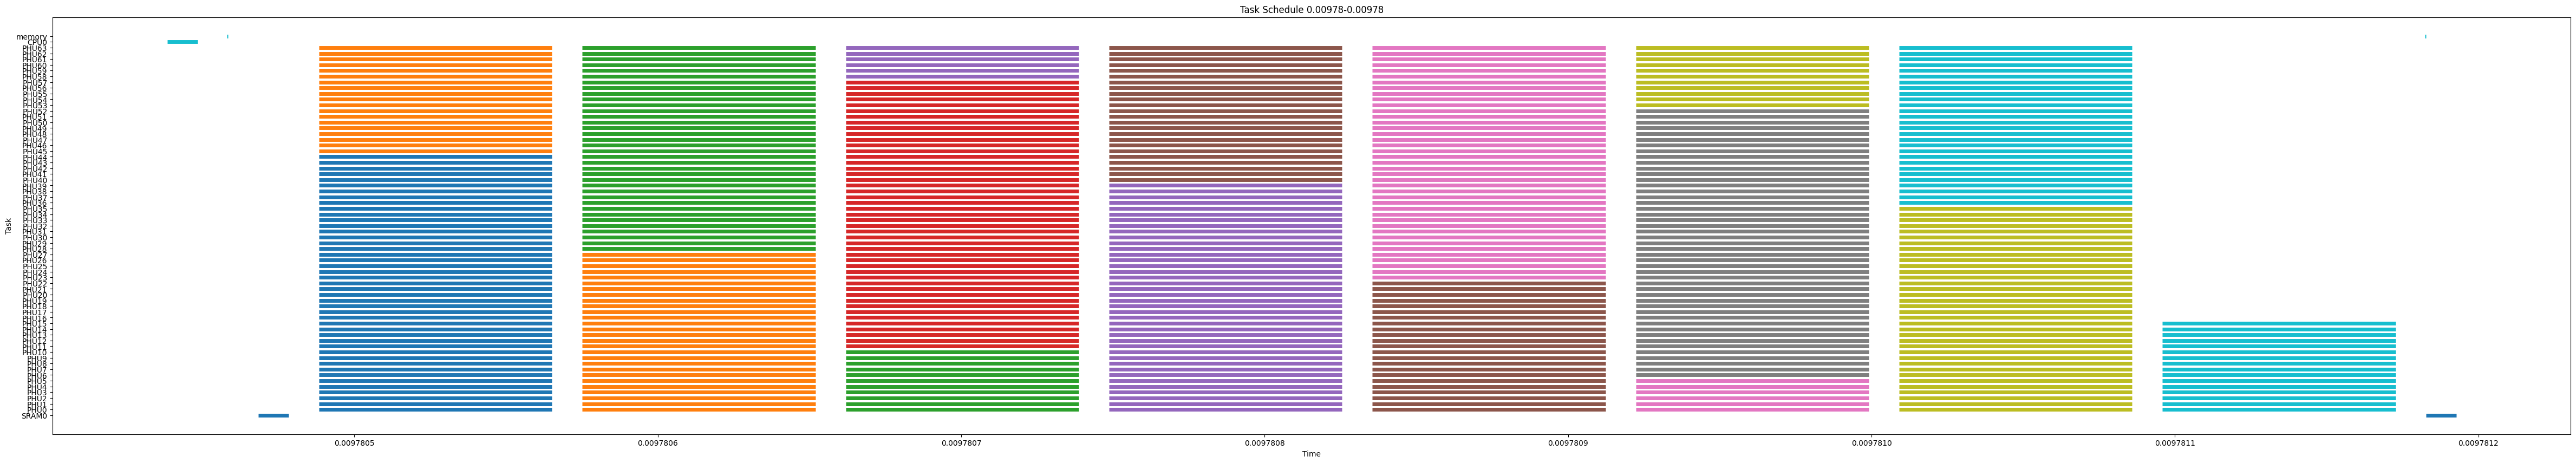

0.01013353039999997 - 0.011917849999999971


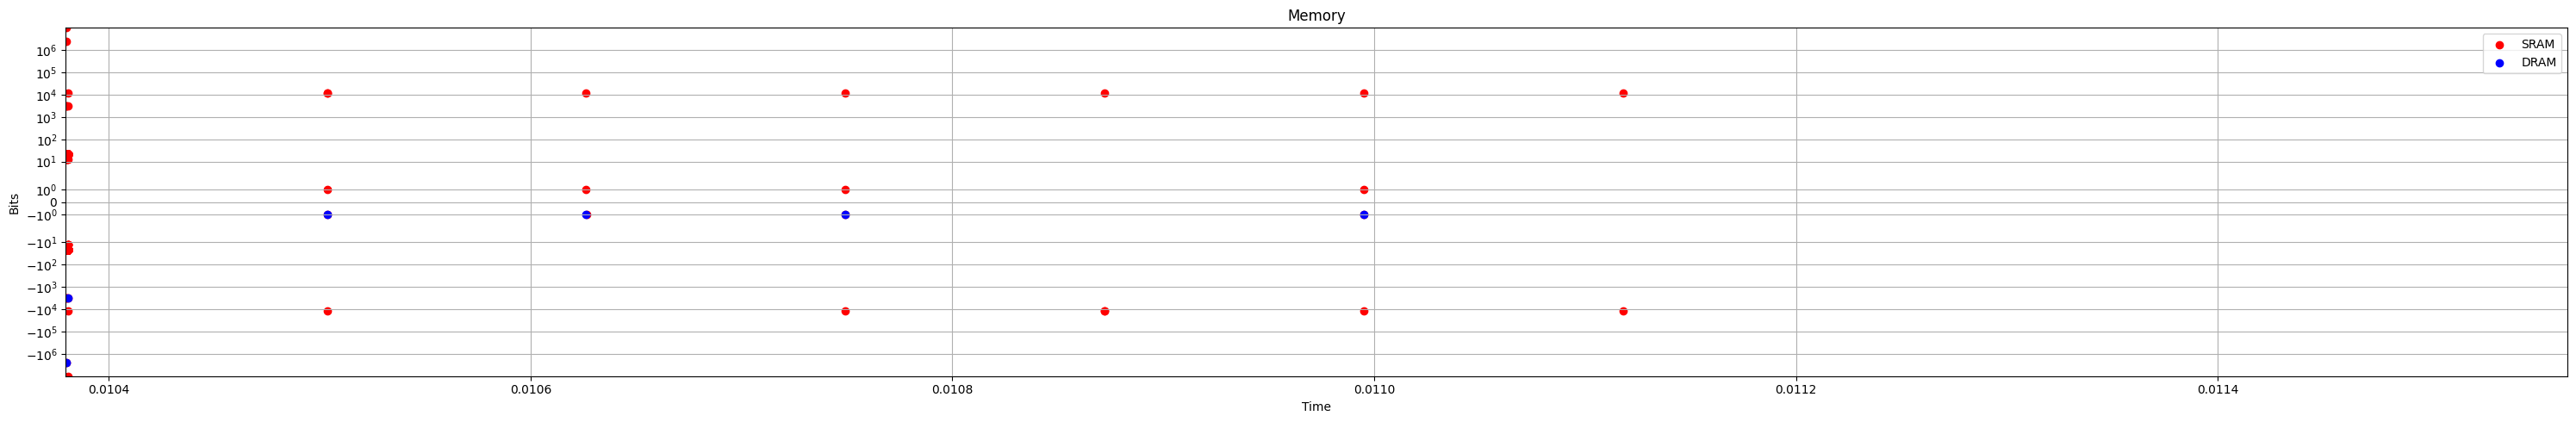

(30817, 4)


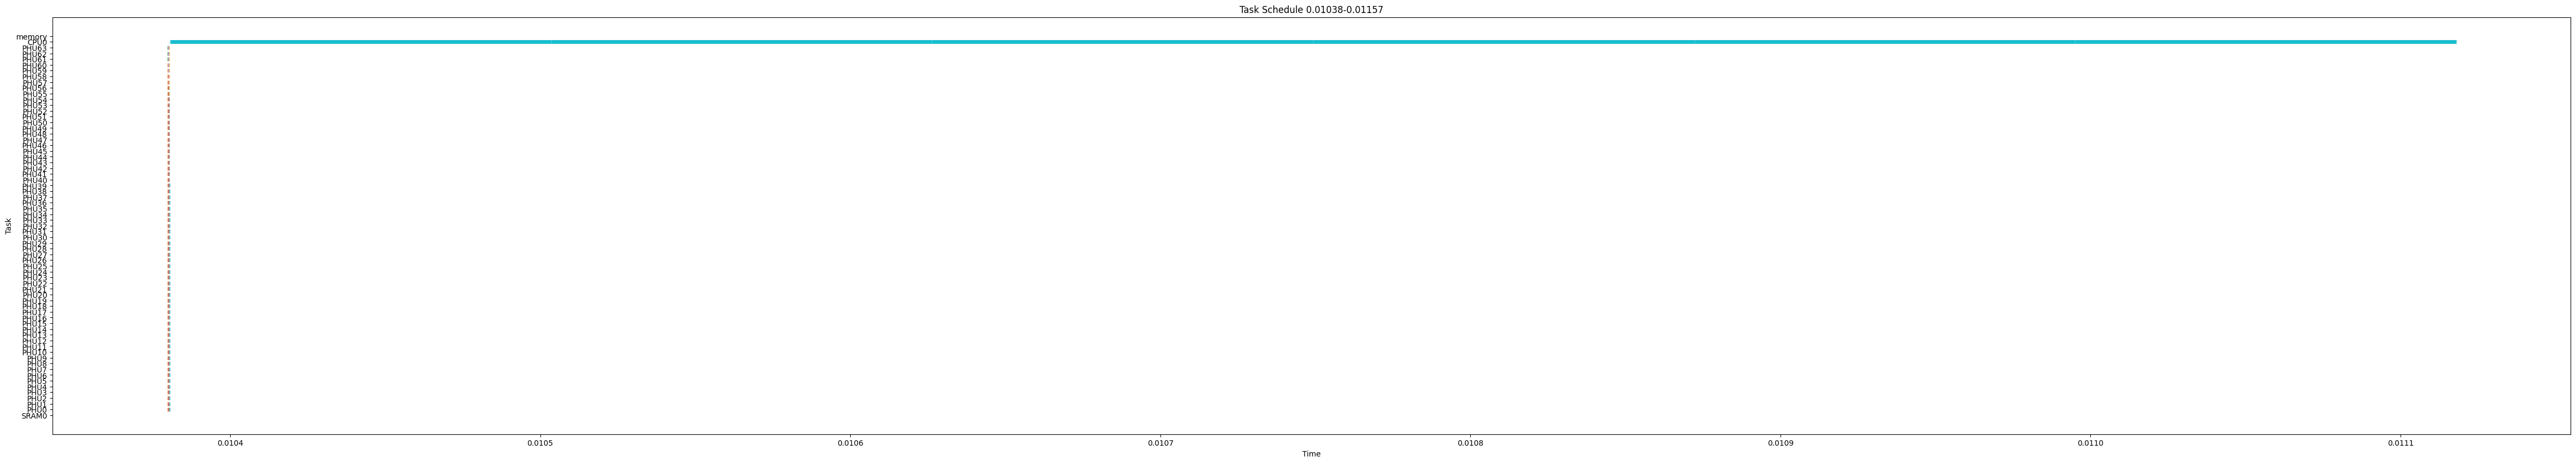

0.011917849999999971 - 0.012517062399999964


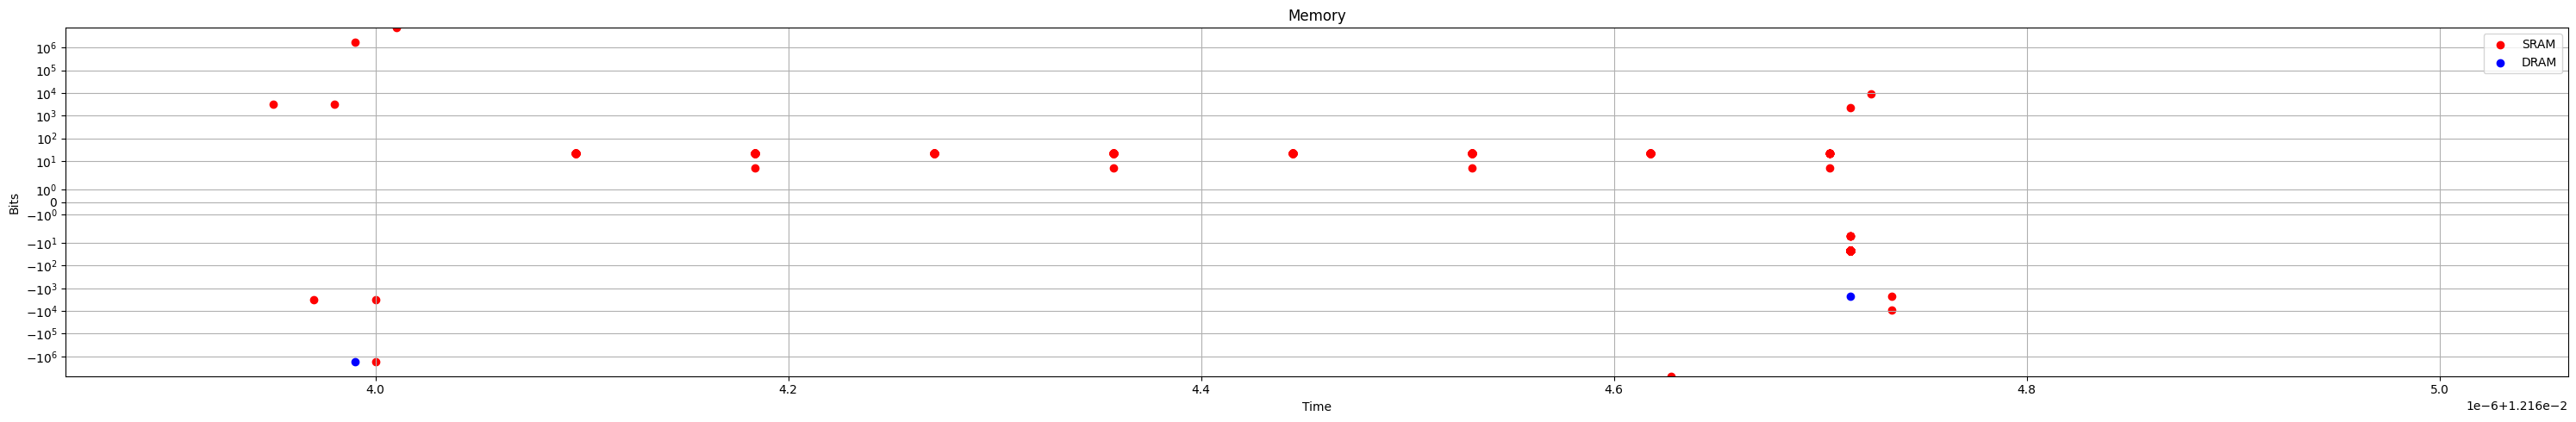

(30817, 4)


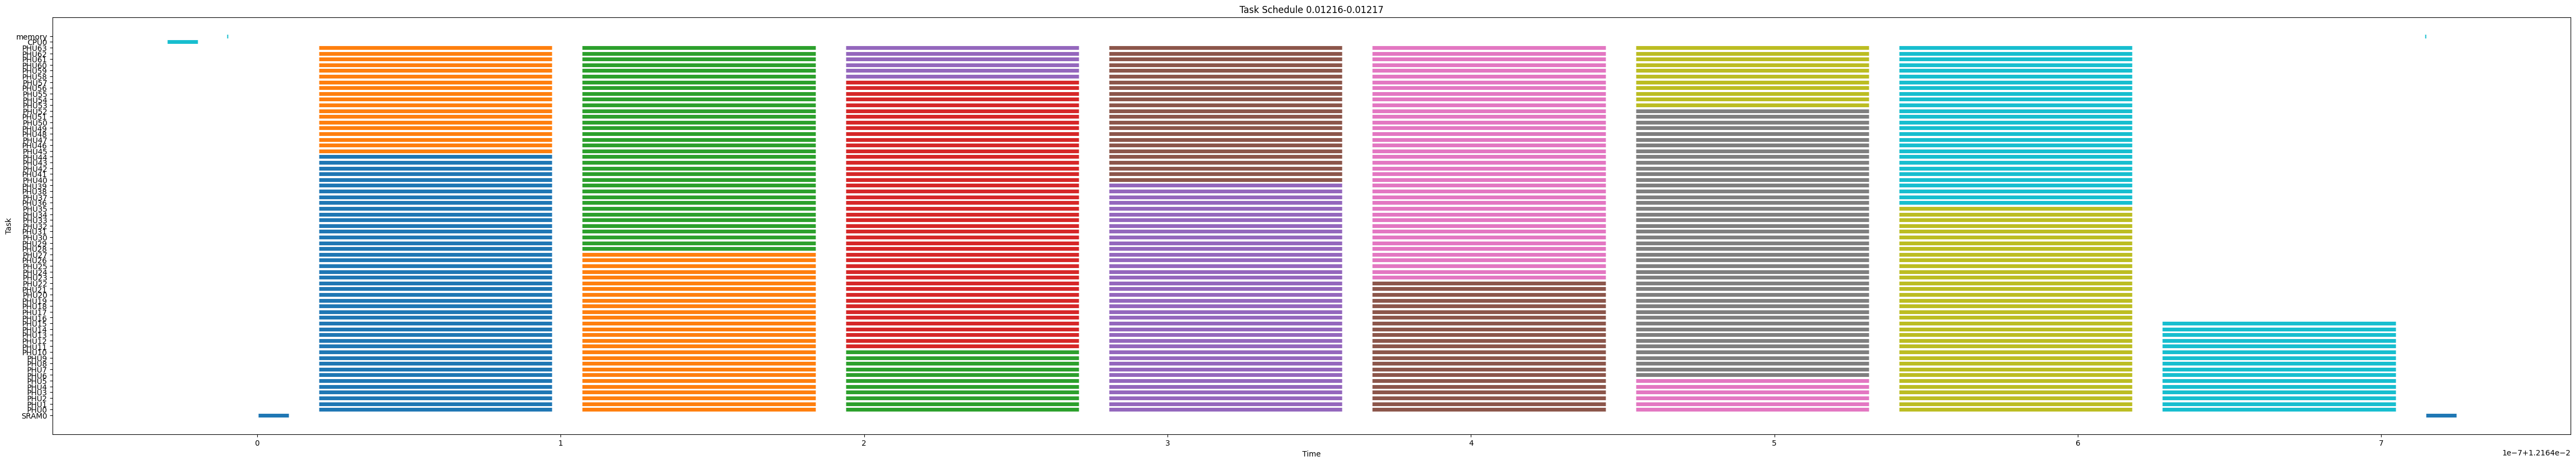

0.012517062399999964 - 0.014301381999999965


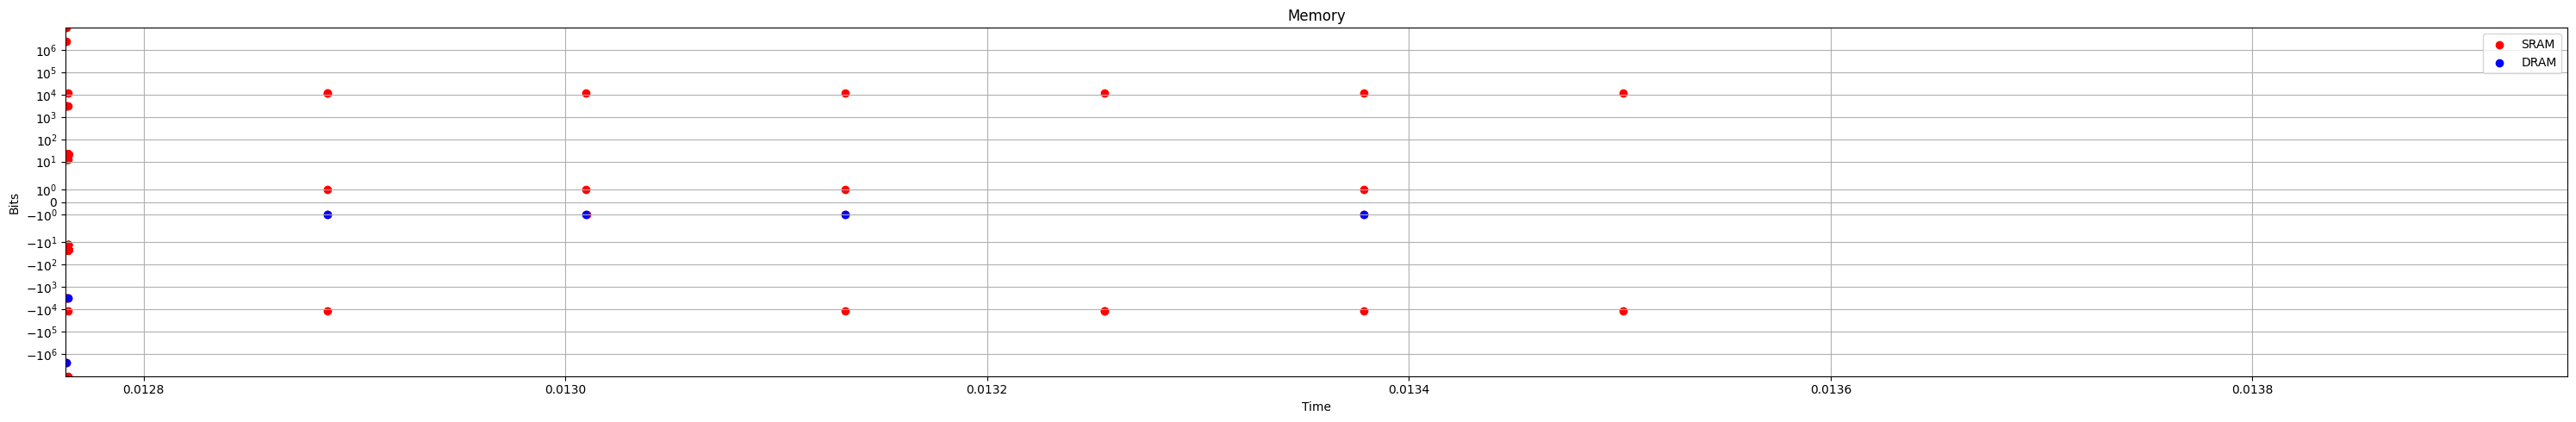

(30817, 4)


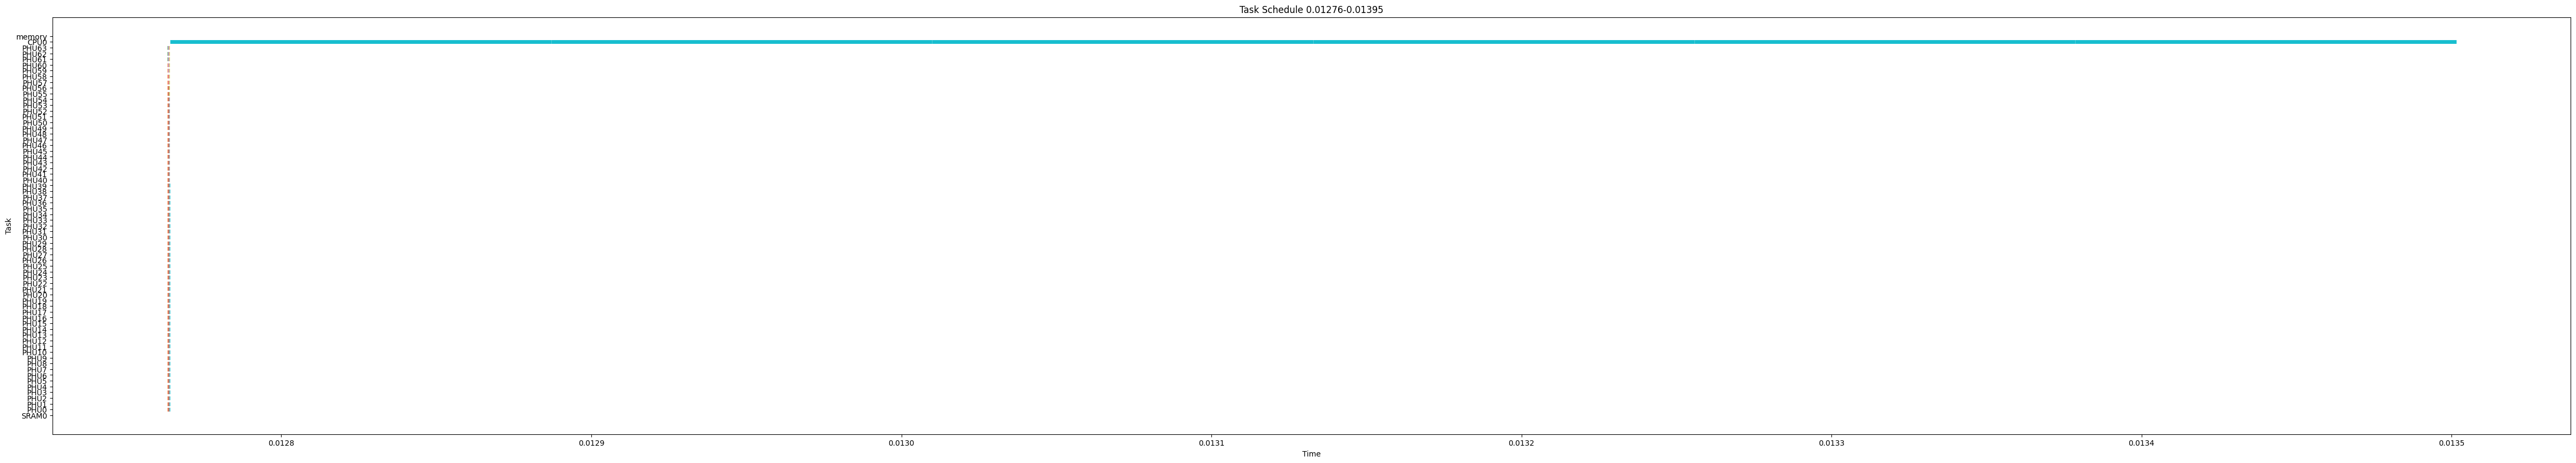

0.014301381999999965 - 0.014900594399999958


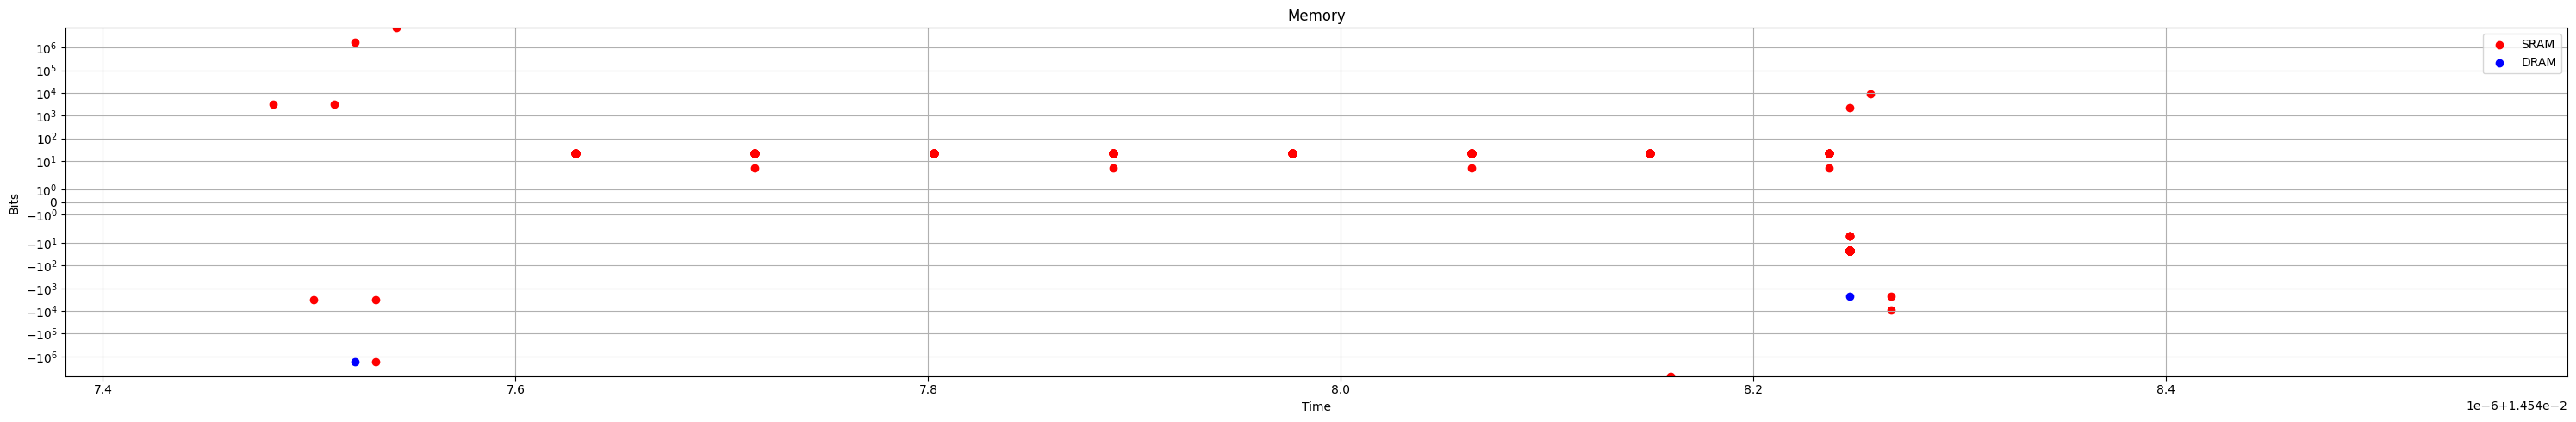

(30817, 4)


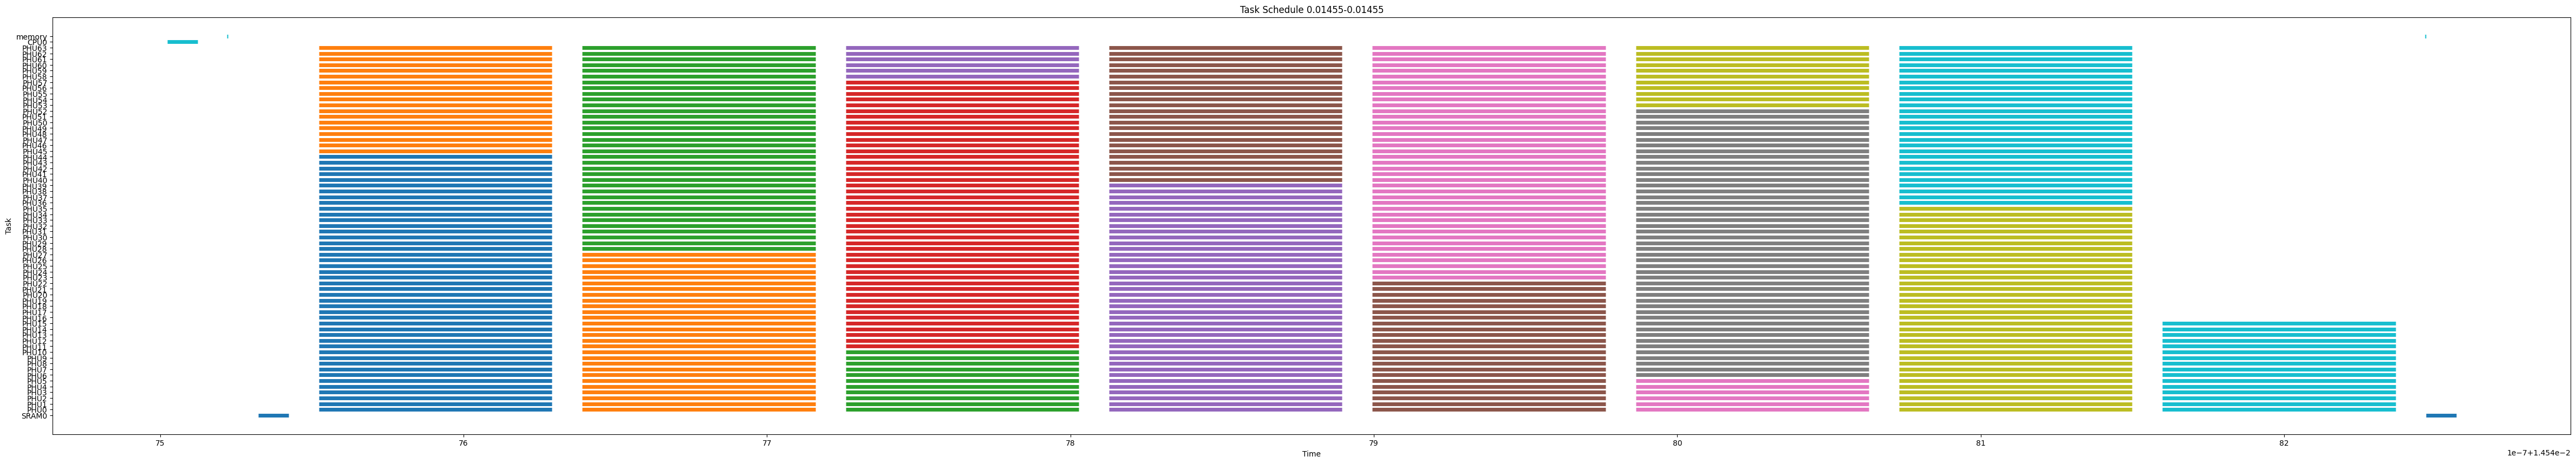

0.014900594399999958 - 0.01668491399999995


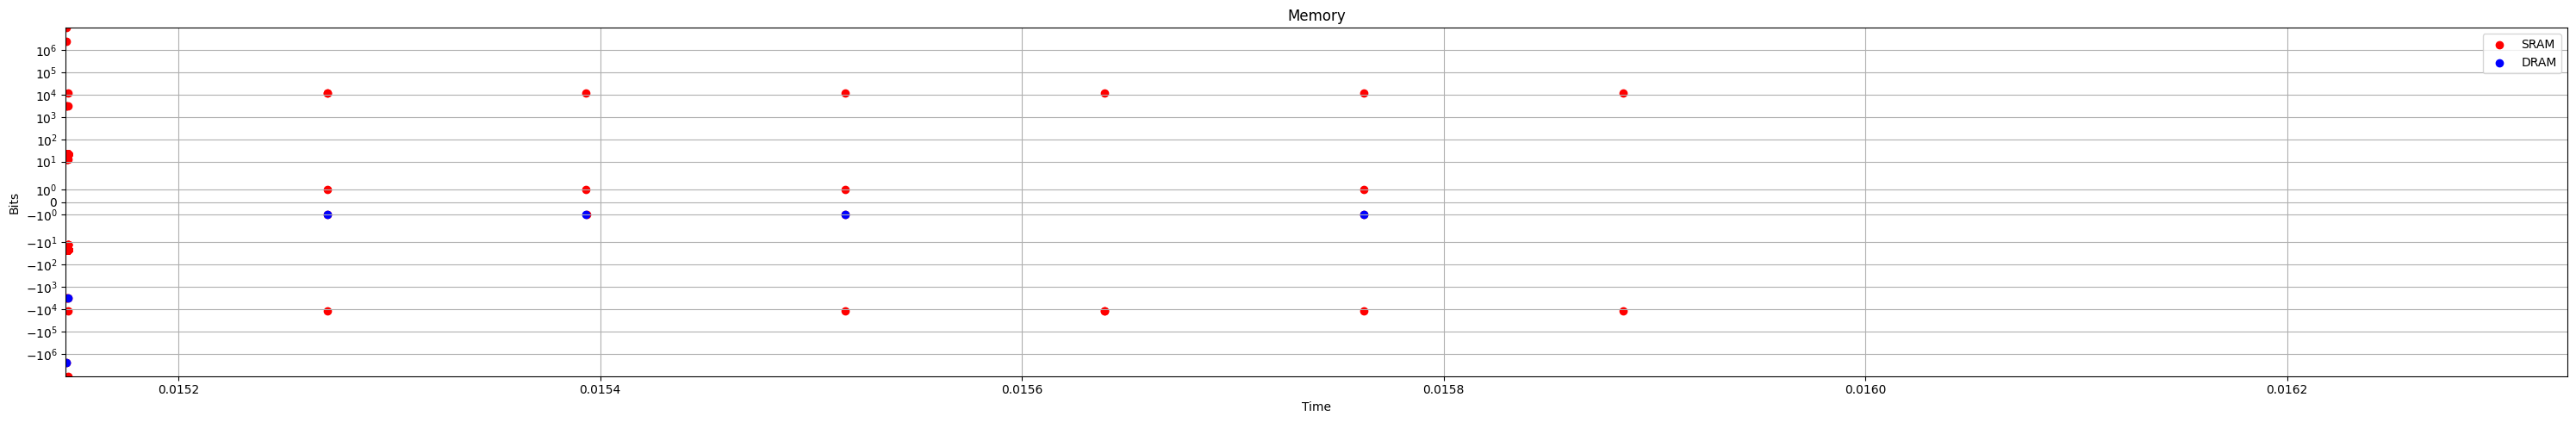

(30817, 4)


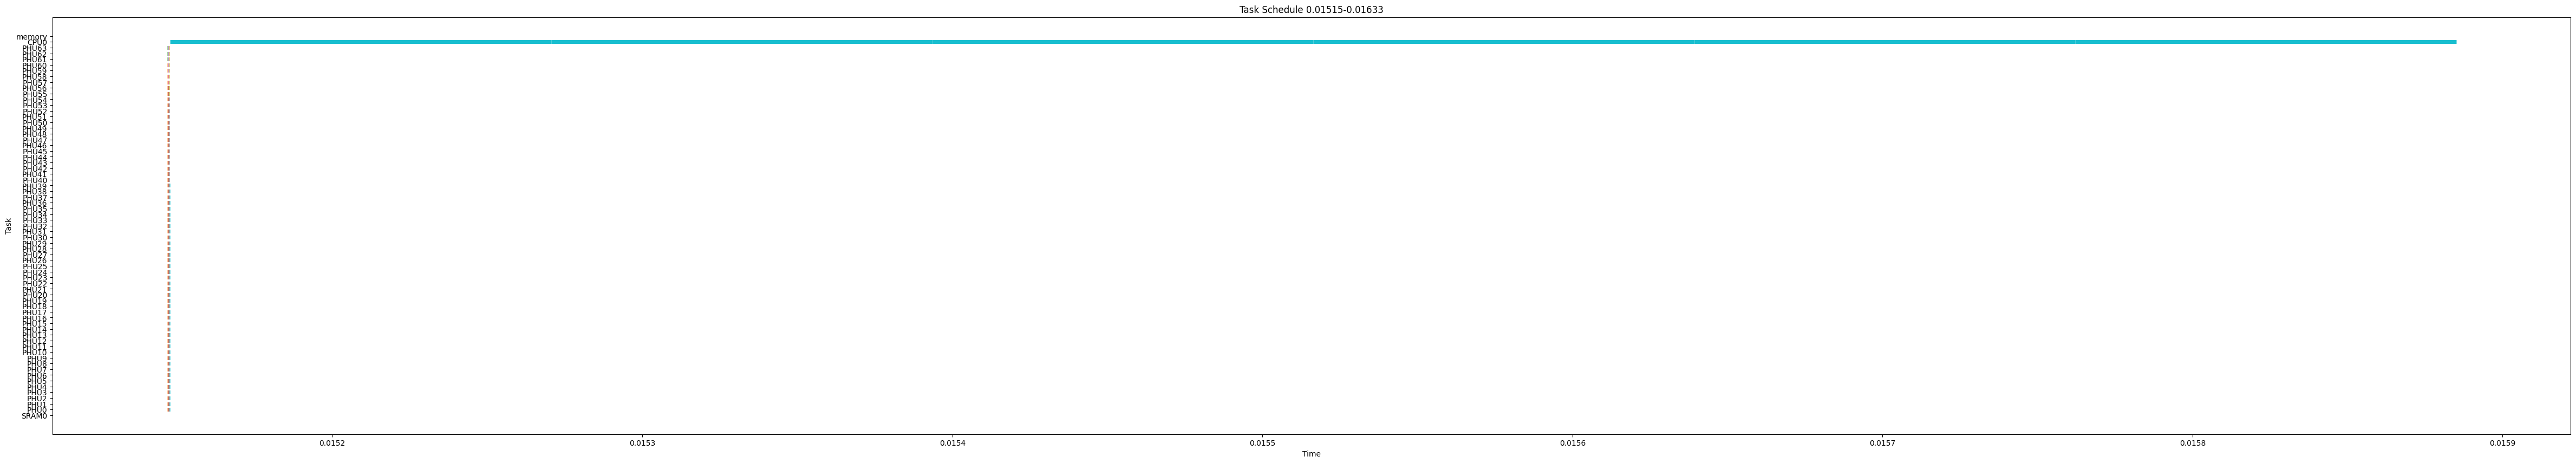

0.01668491399999995 - 0.01728412639999998


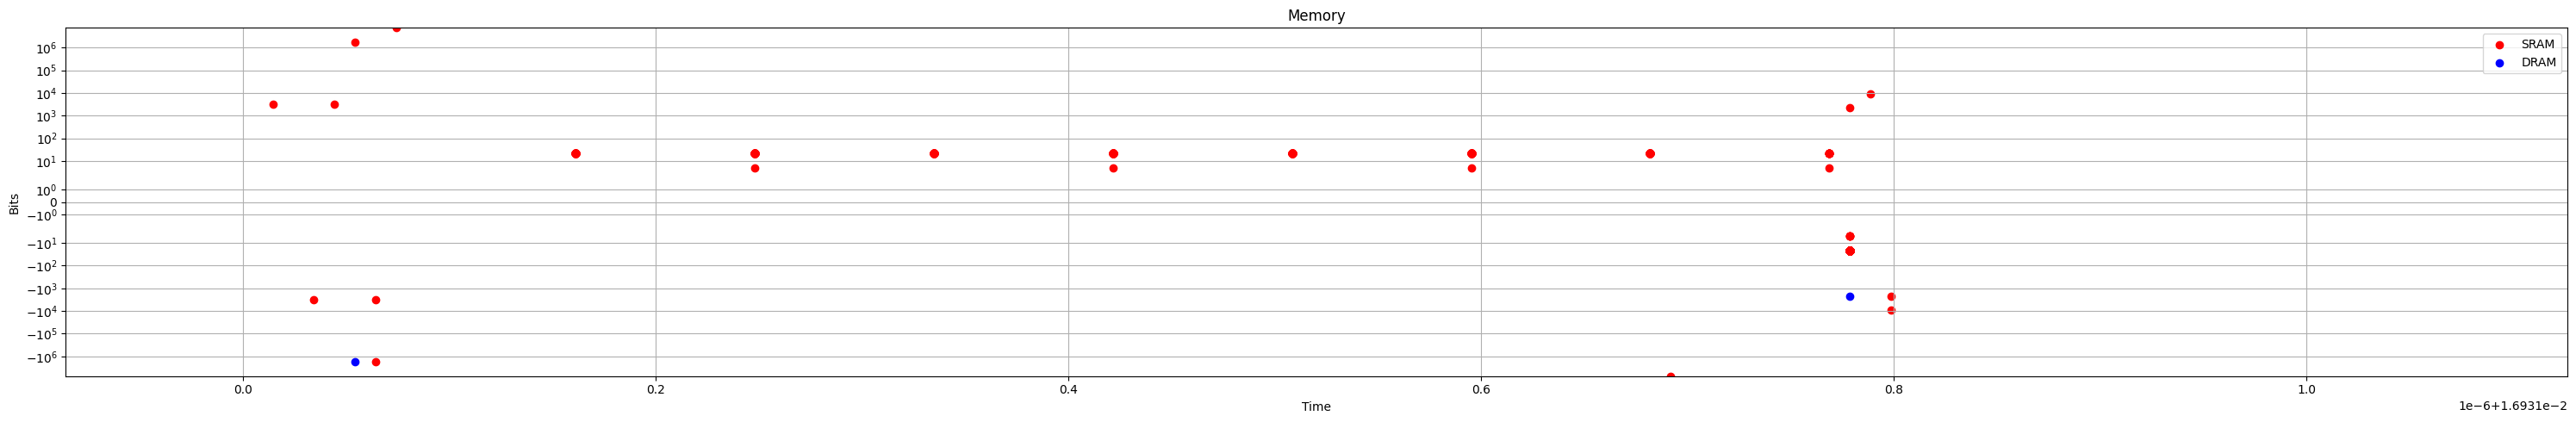

(30817, 4)


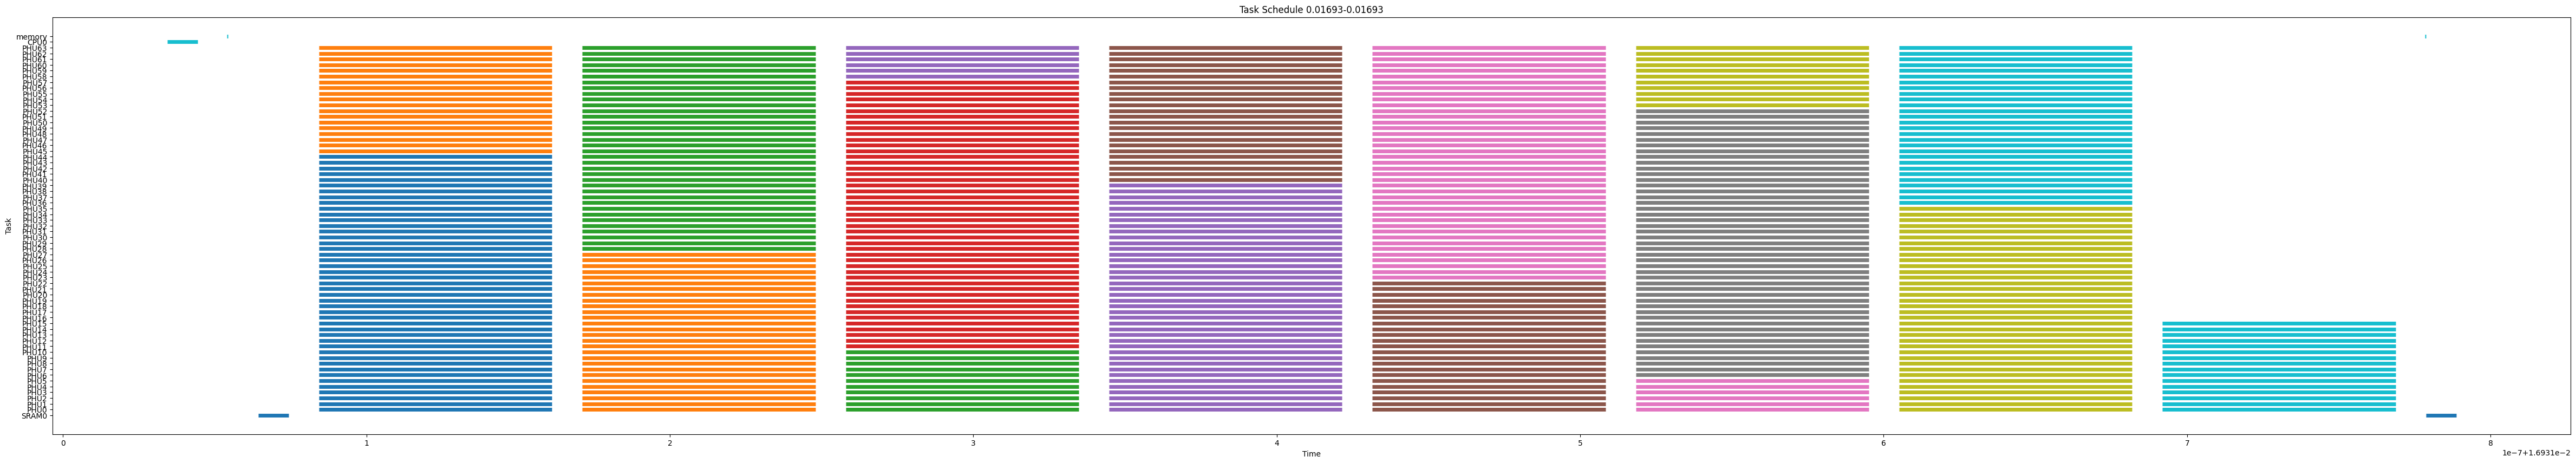

0.01728412639999998 - 0.019068445999999985


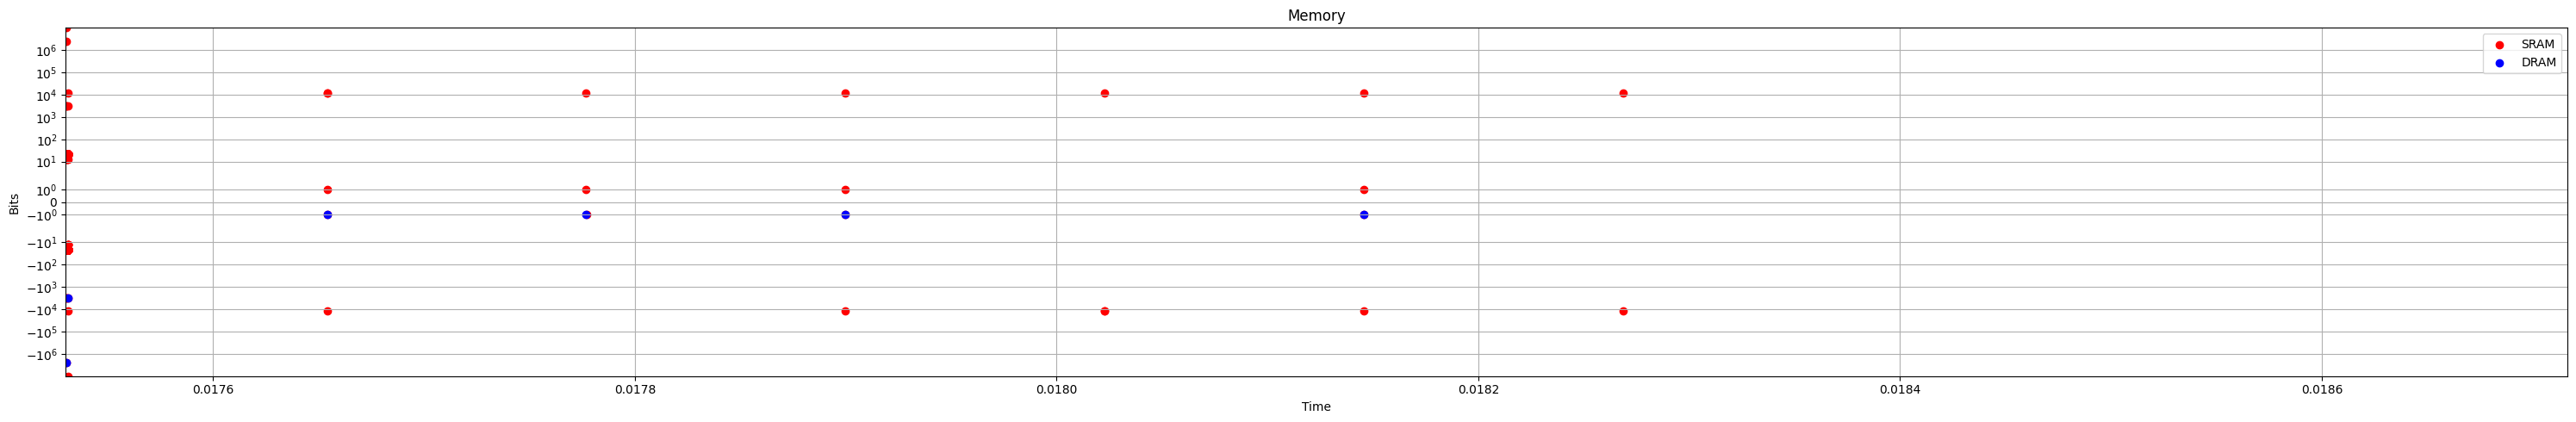

(30817, 4)


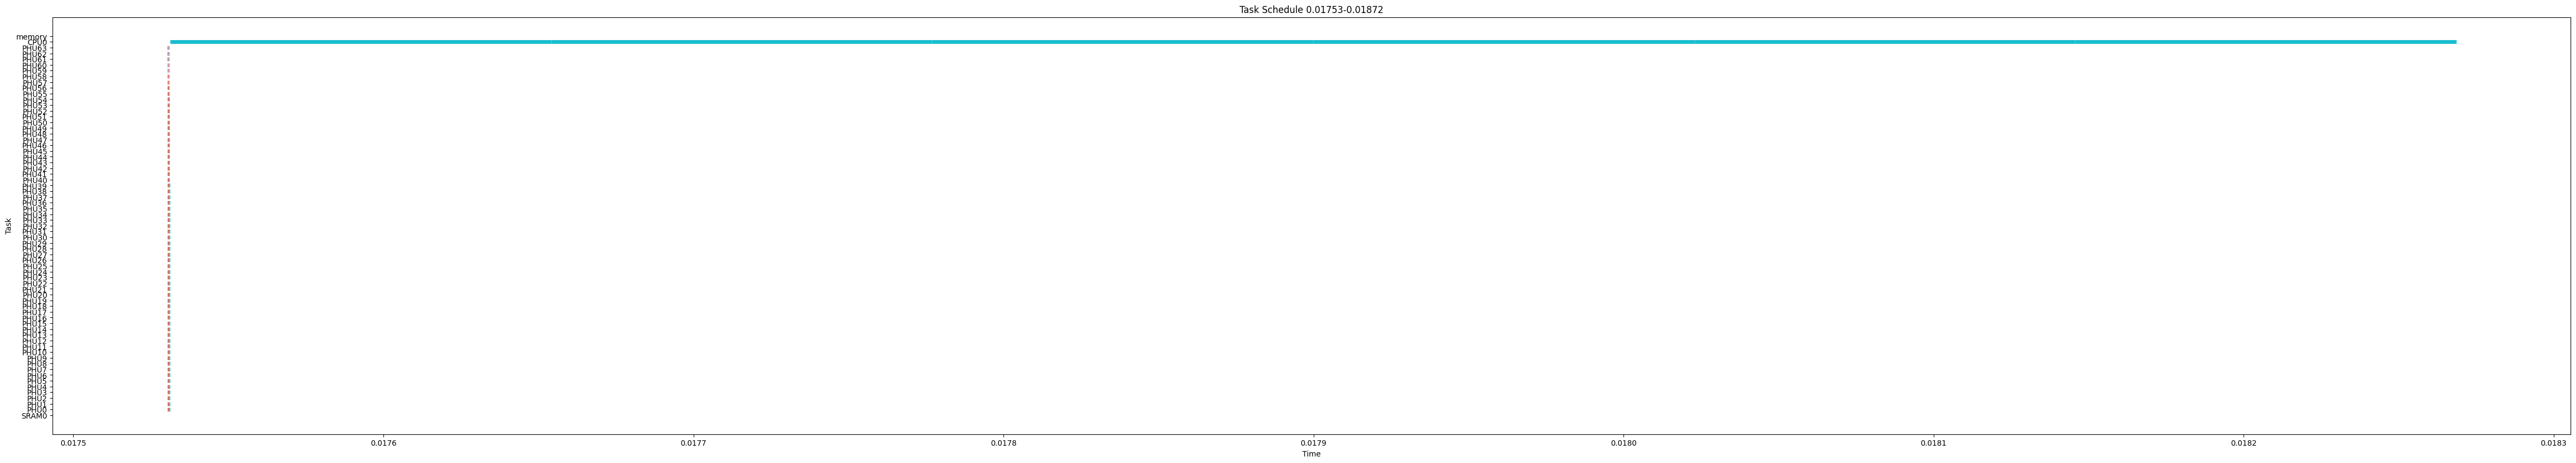

0.019068445999999985 - 0.019667658400000017


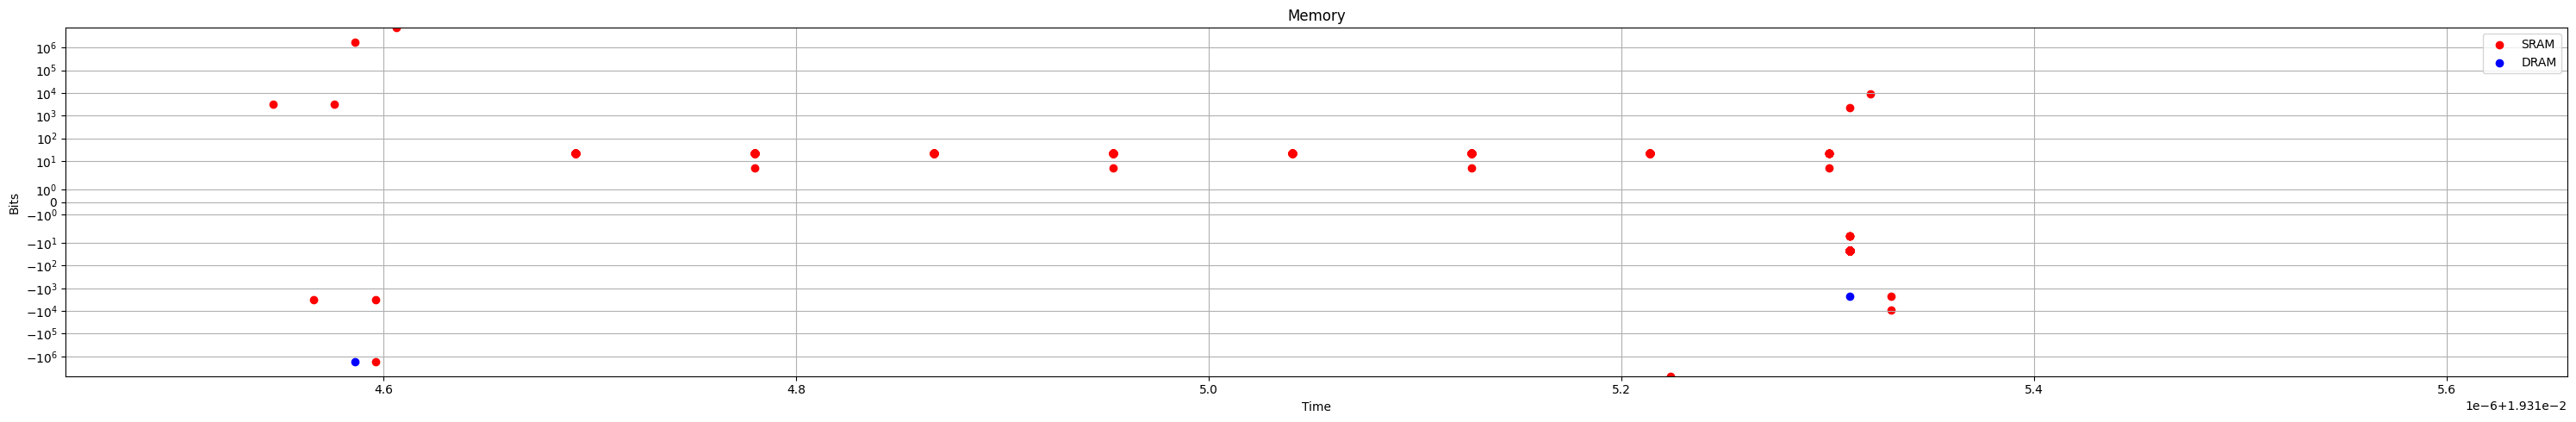

(30817, 4)


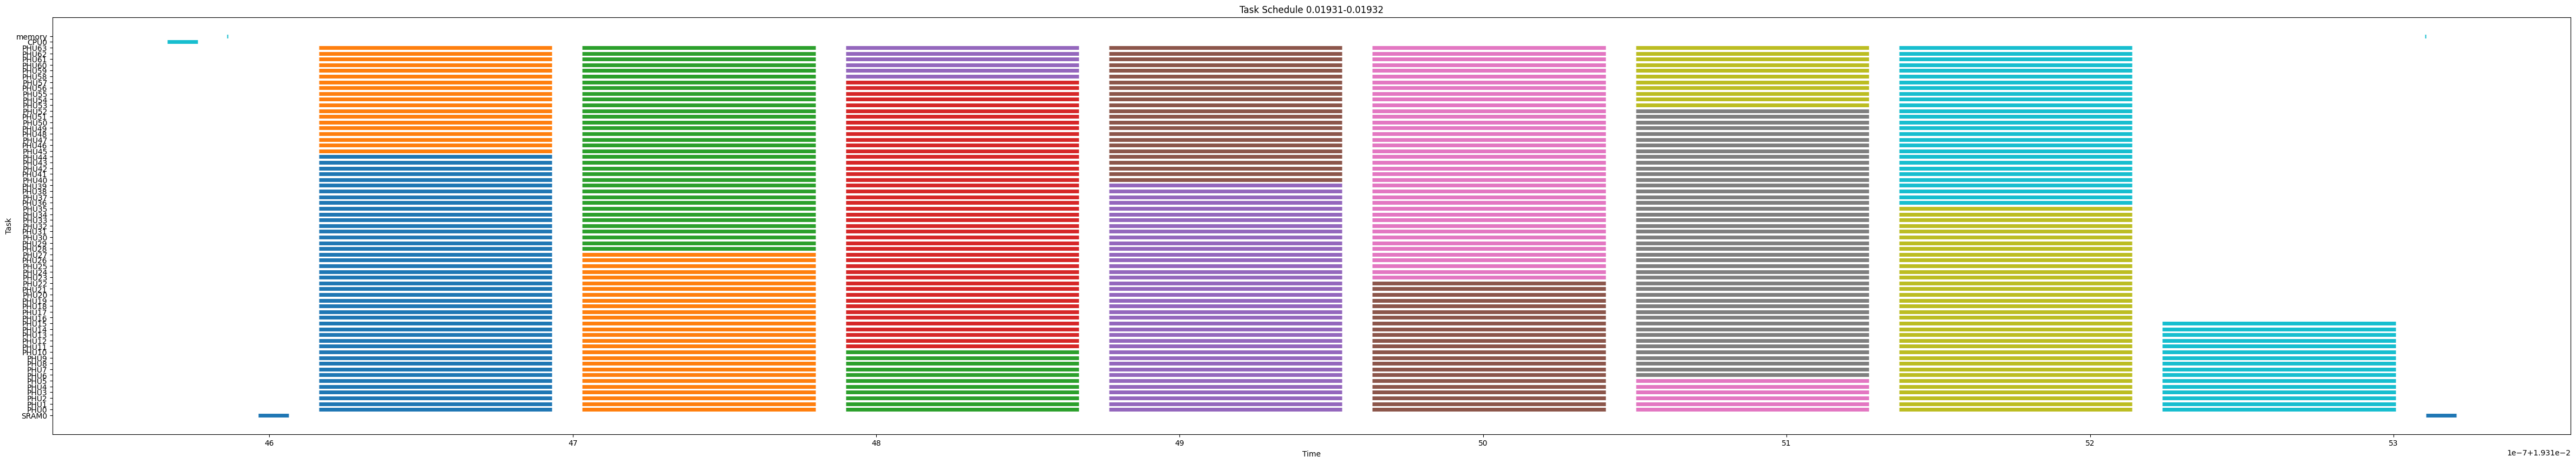

0.019667658400000017 - 0.02145197800000002


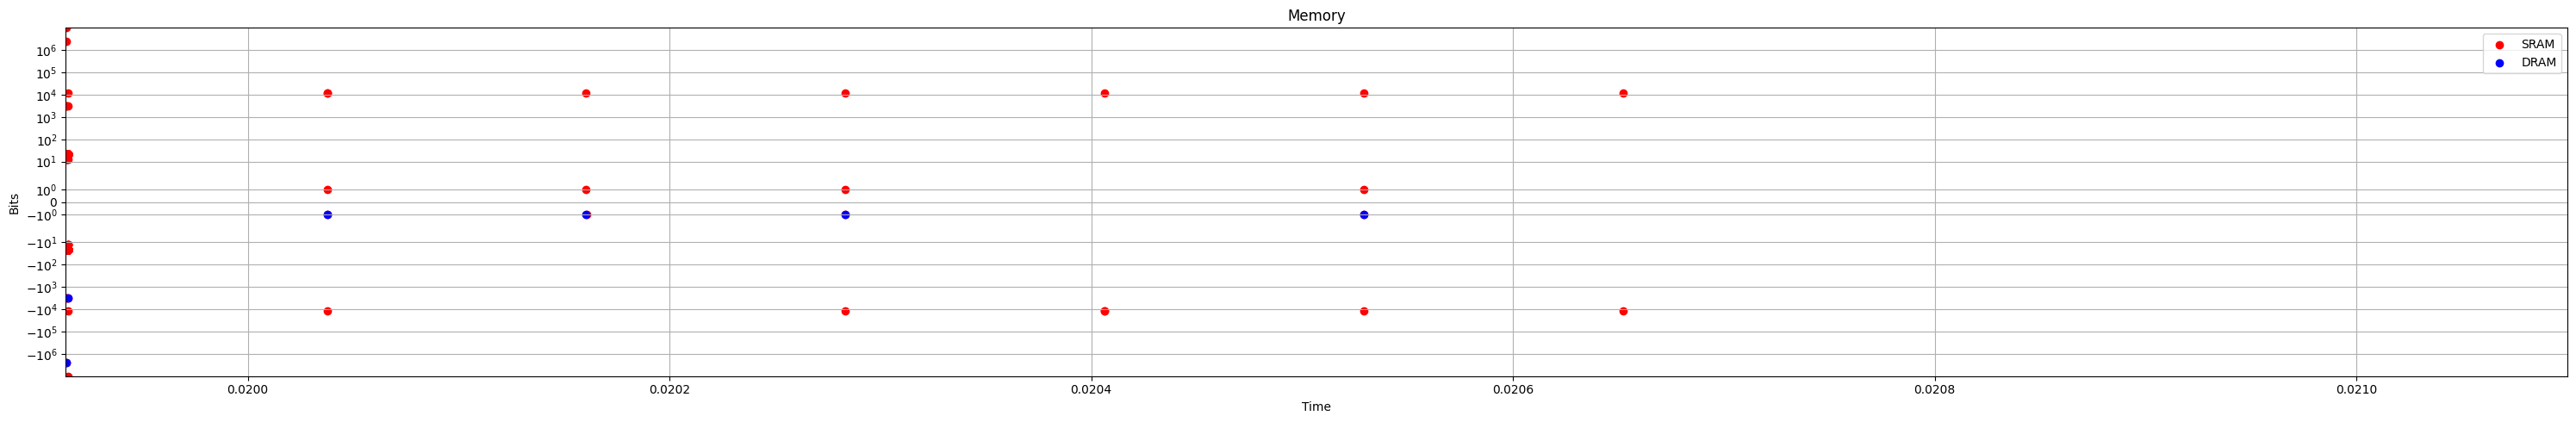

(30817, 4)


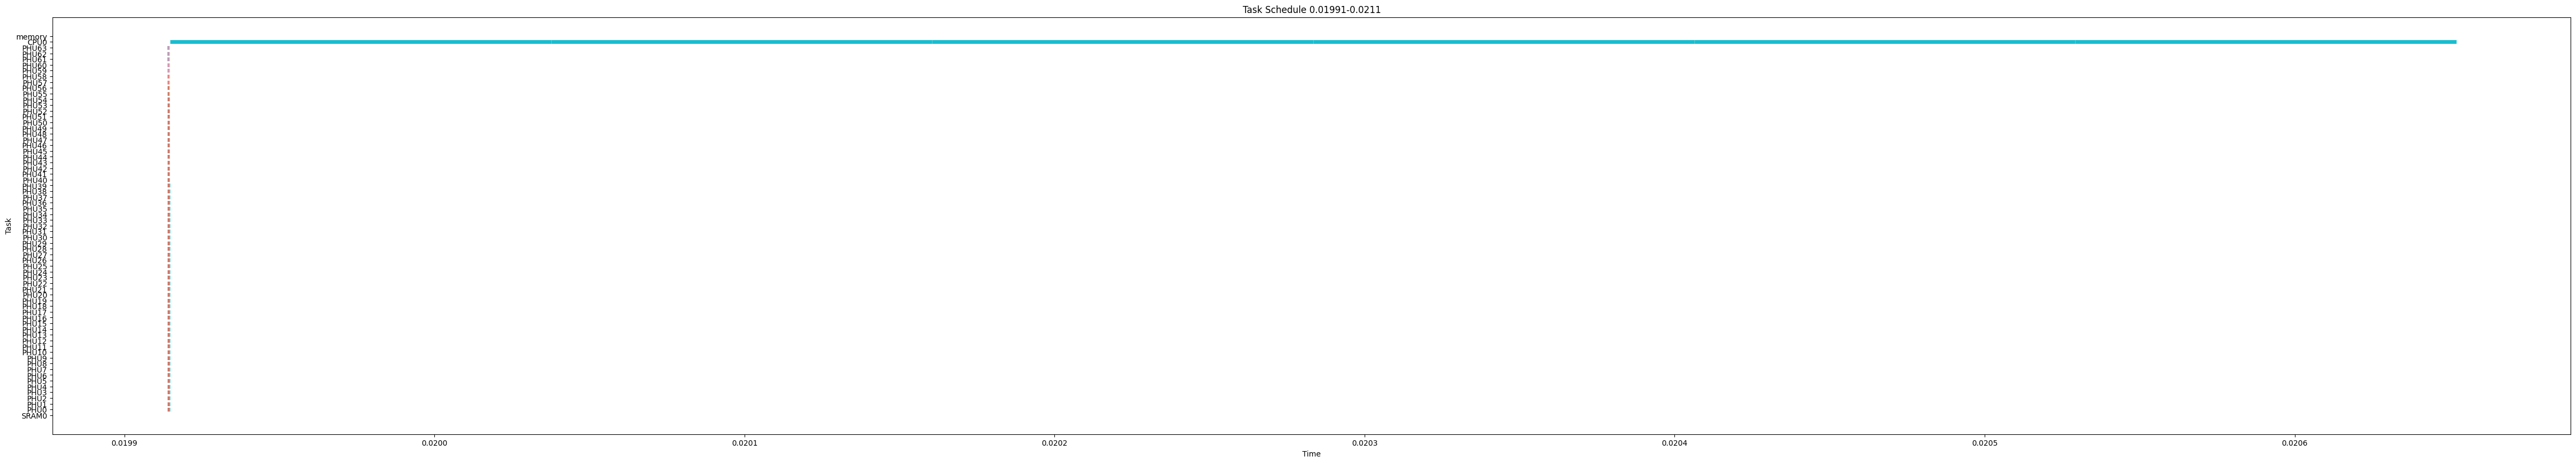

0.02145197800000002 - 0.022051190400000052


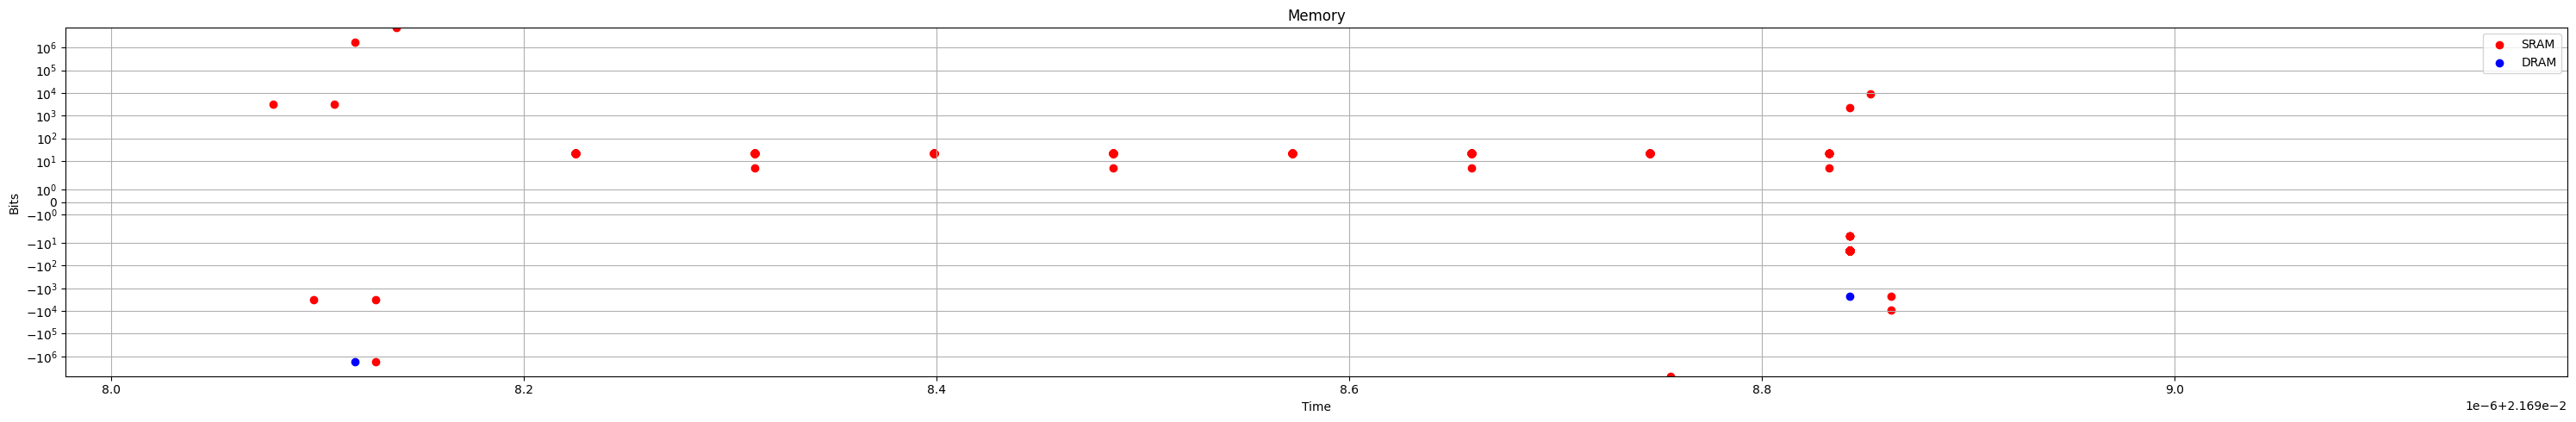

(30817, 4)


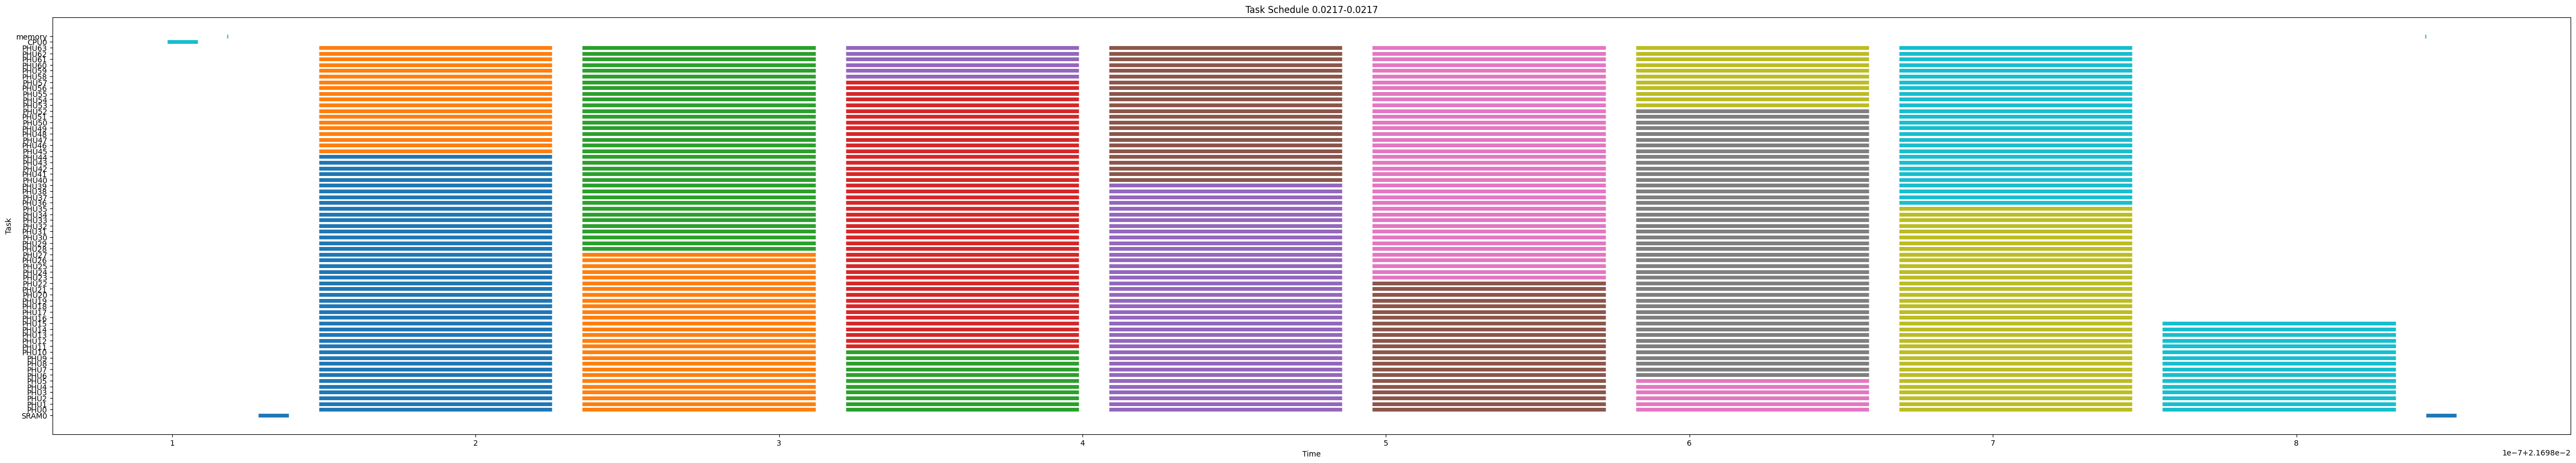

0.022051190400000052 - 0.023835510000000056


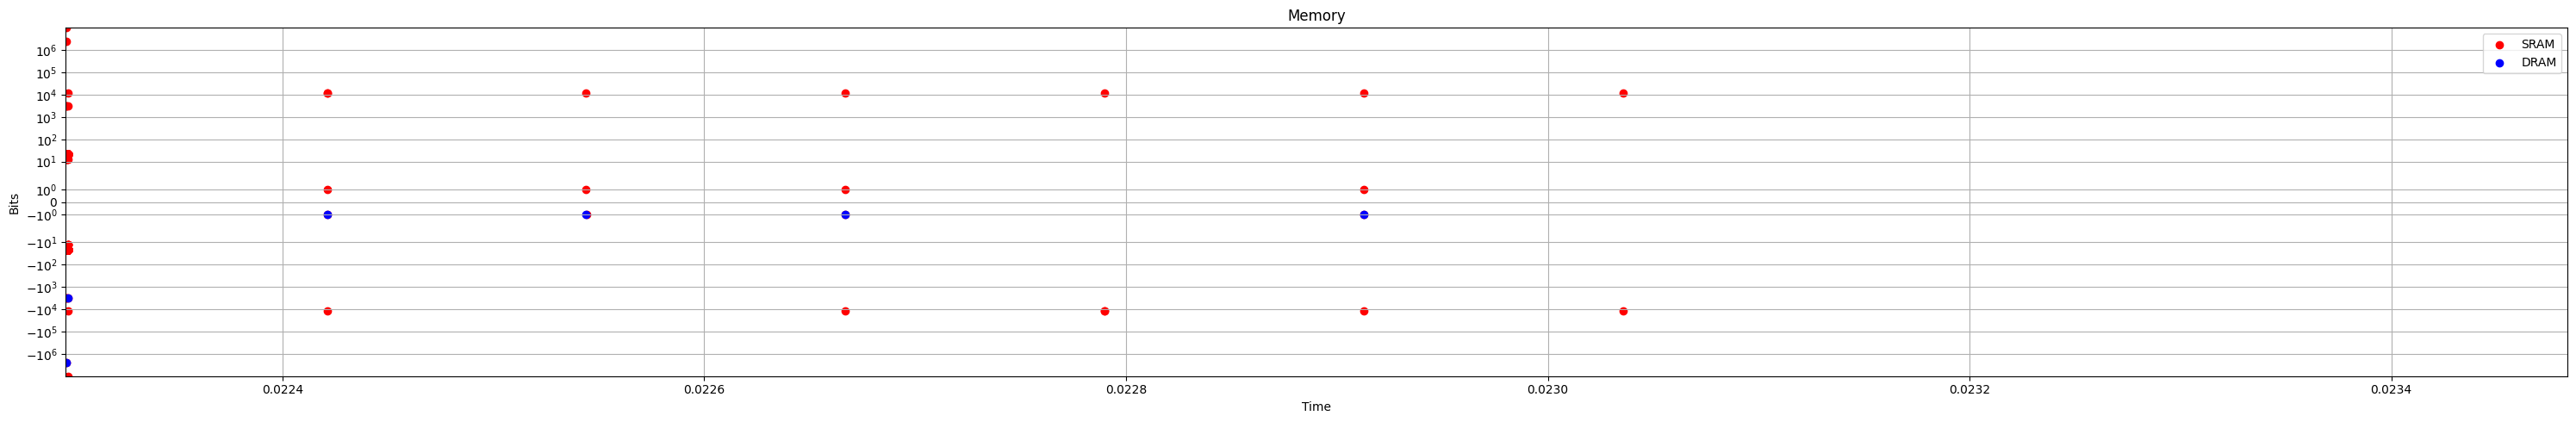

(30817, 4)


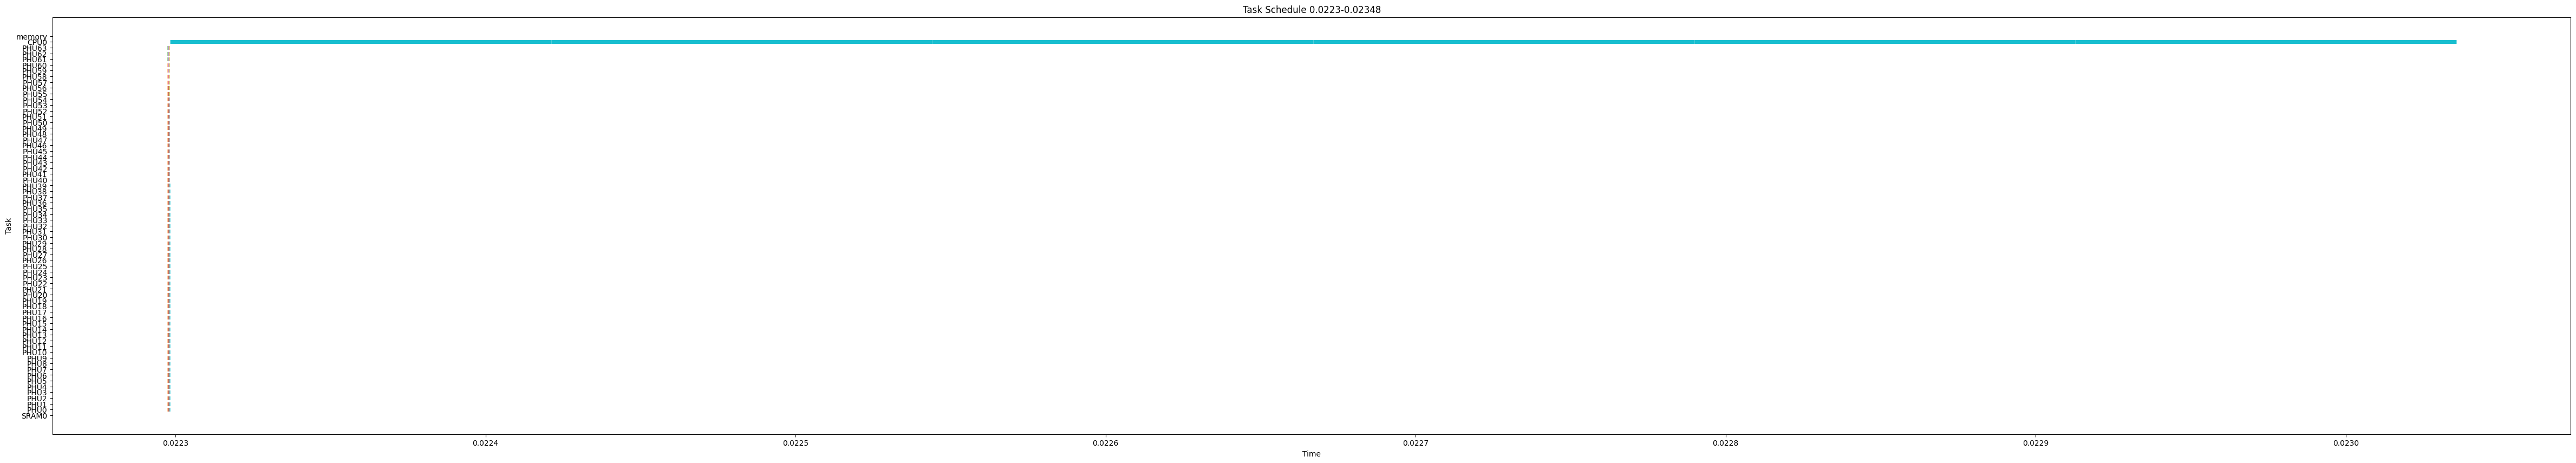

0.023835510000000056 - 0.024434722400000088


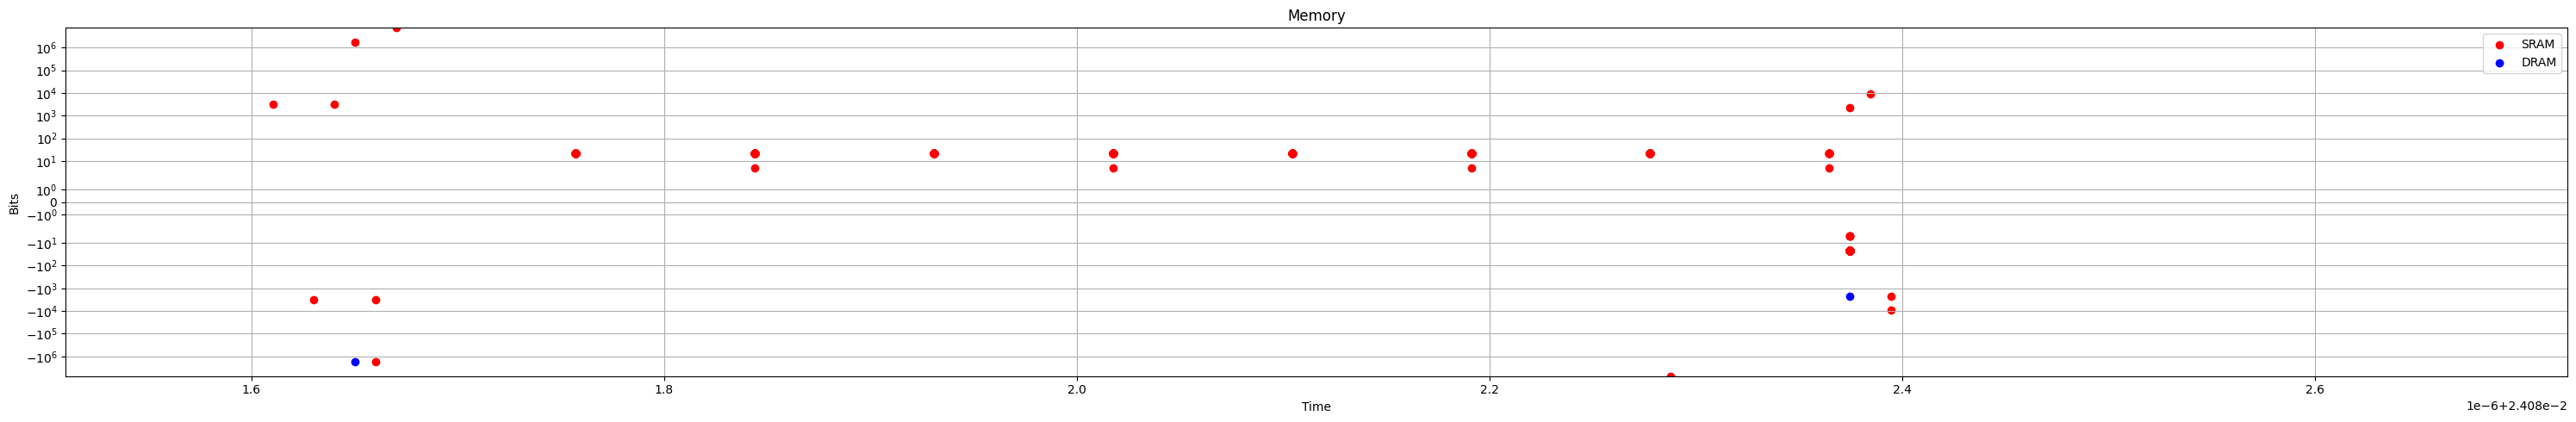

(30817, 4)


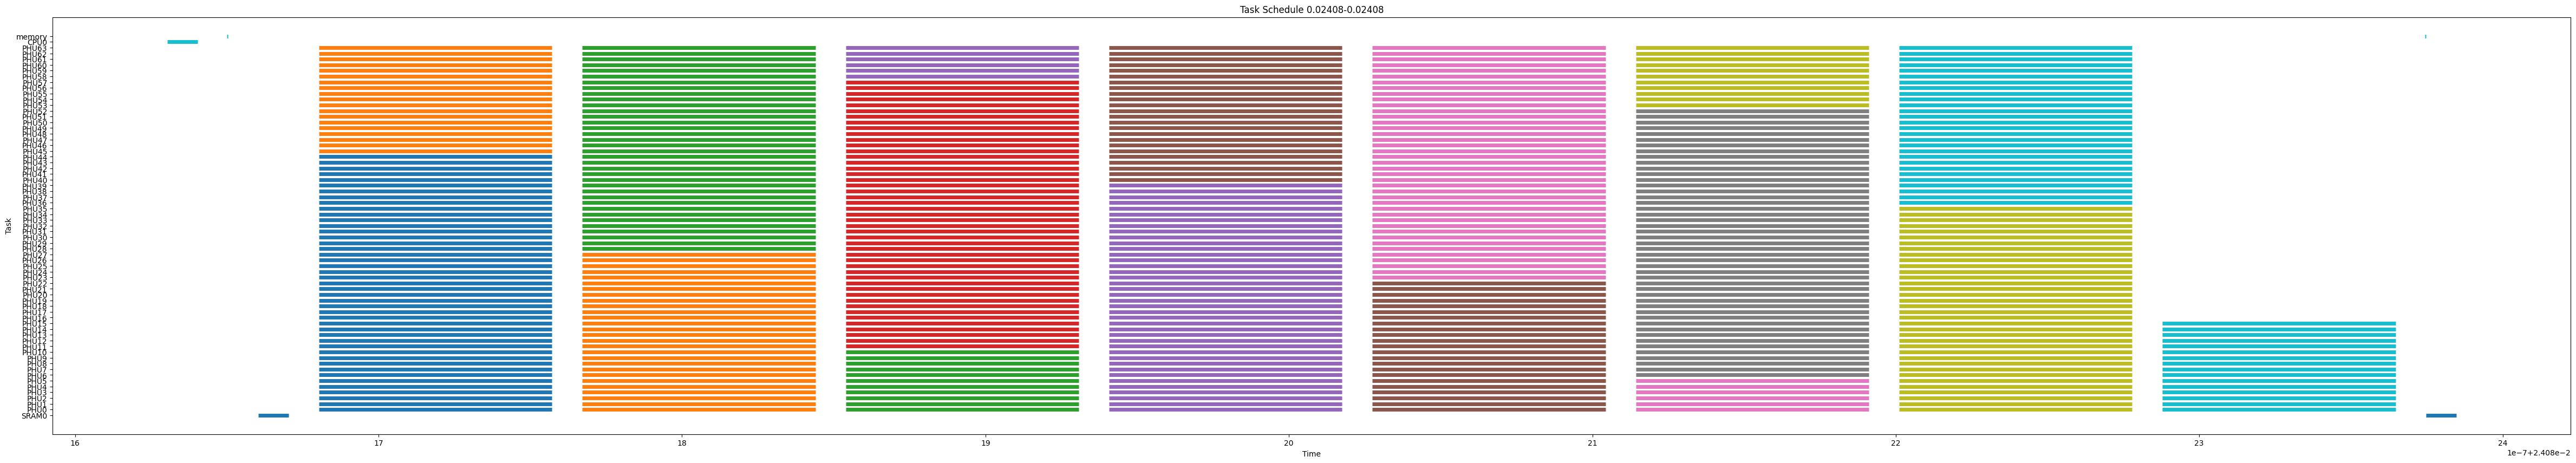

0.024434722400000088 - 0.02621904200000009


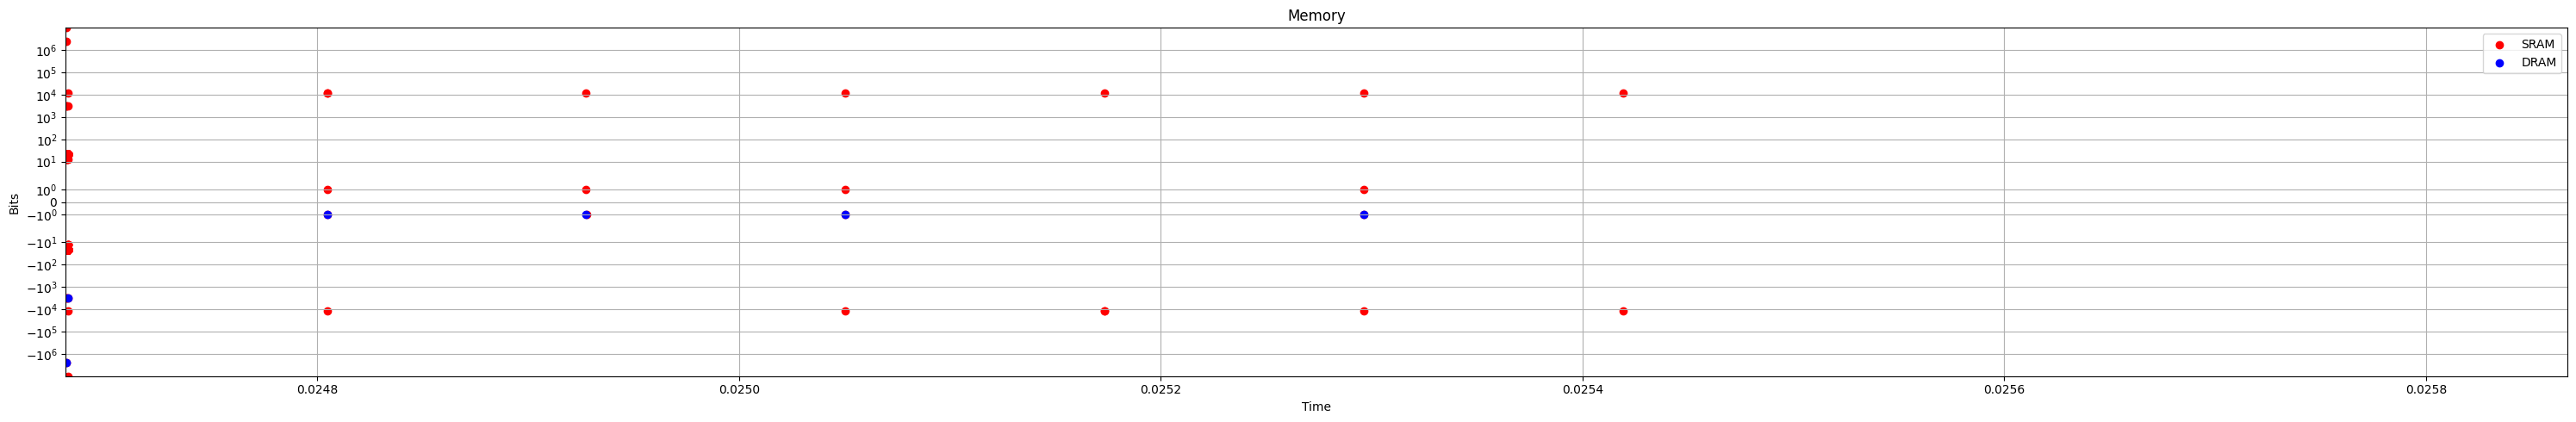

(30817, 4)


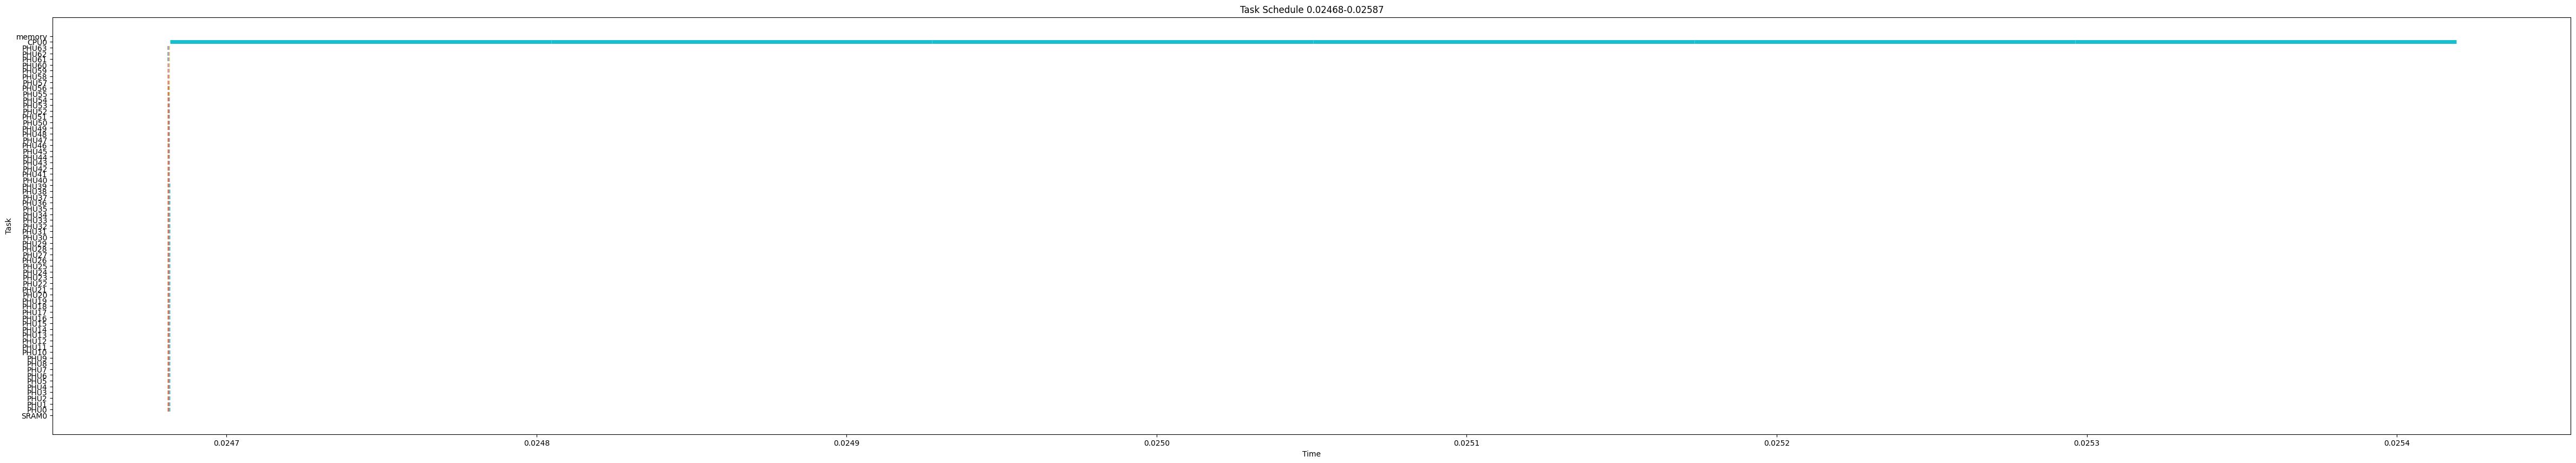

0.02621904200000009 - 0.026818254400000123


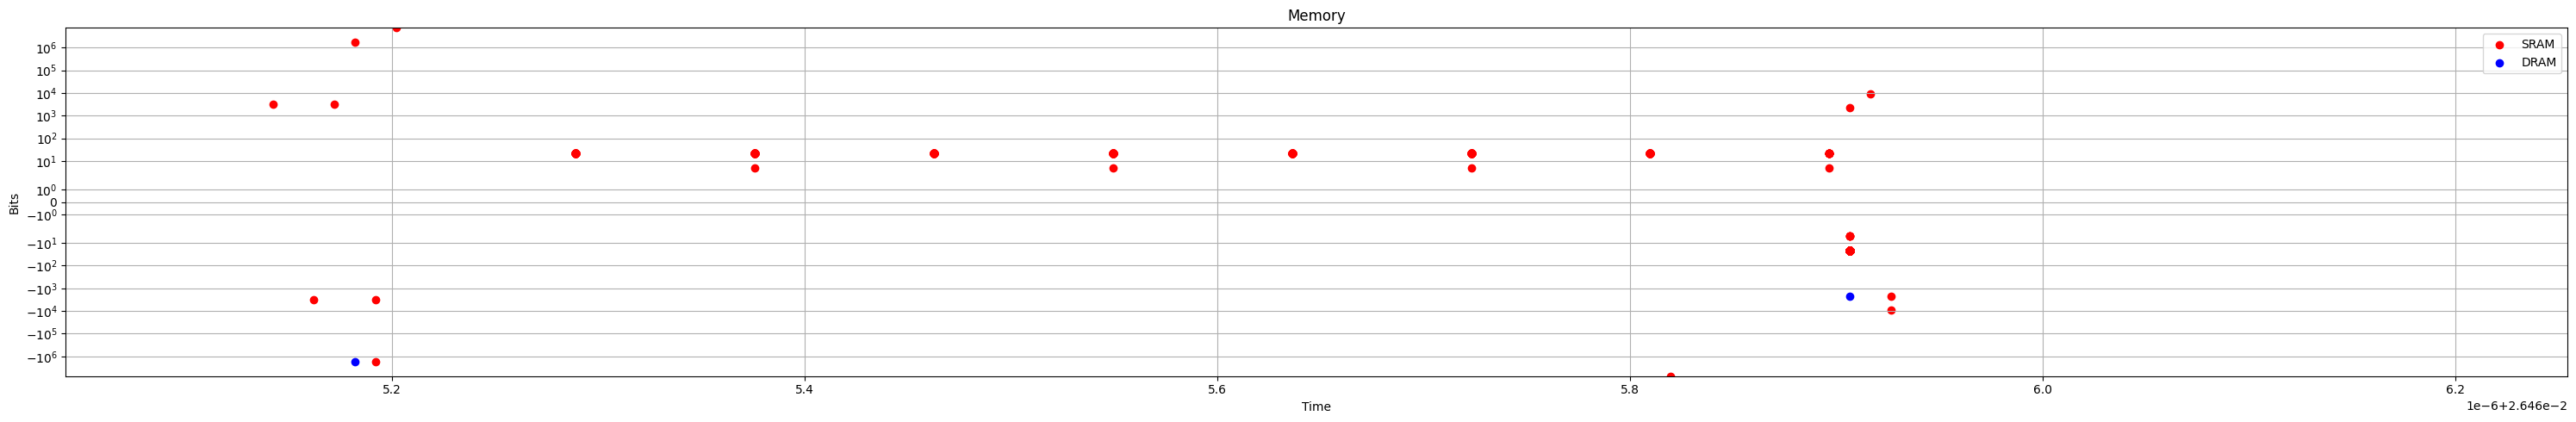

(30817, 4)


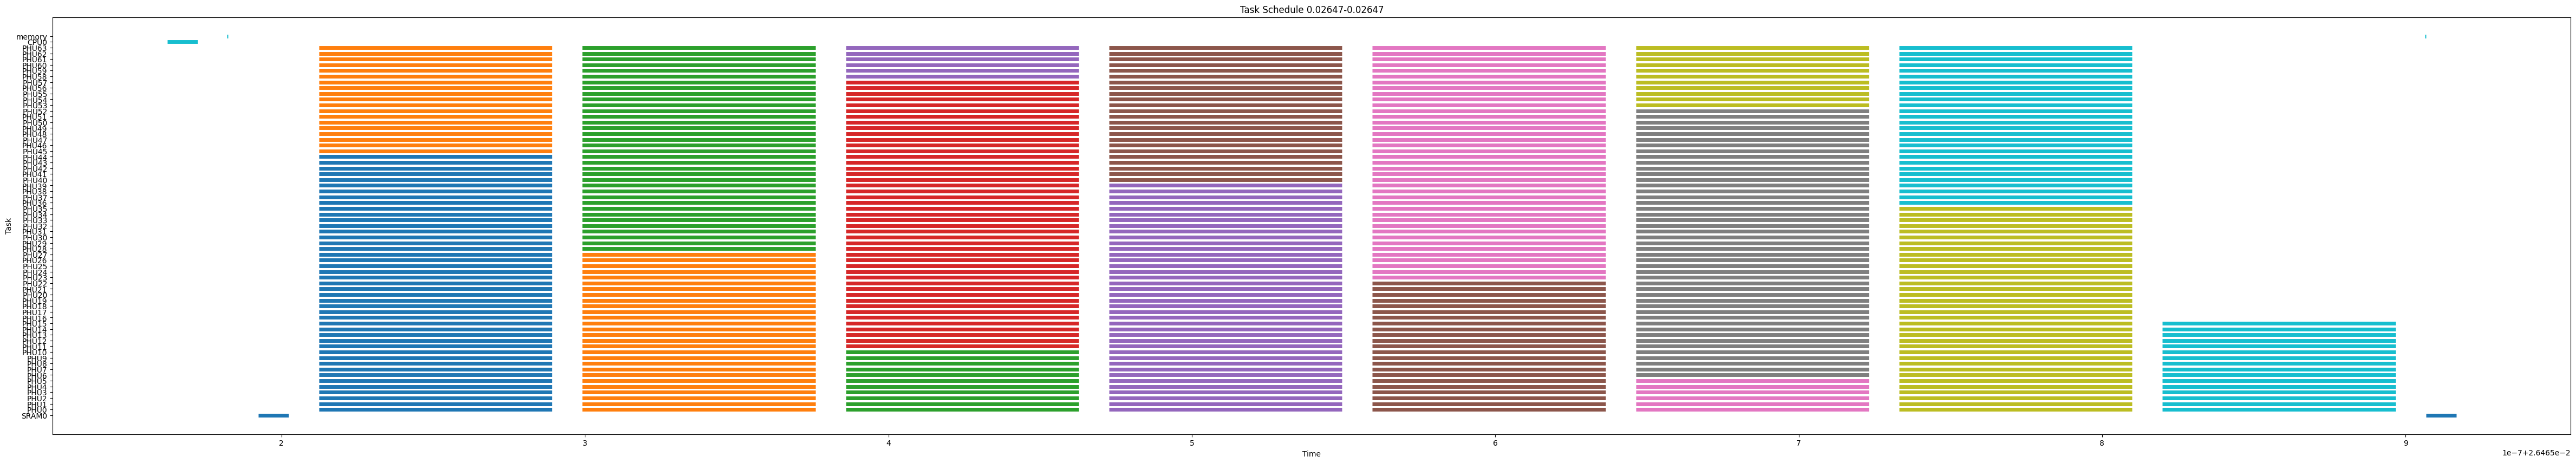

0.026818254400000123 - 0.028602574000000127


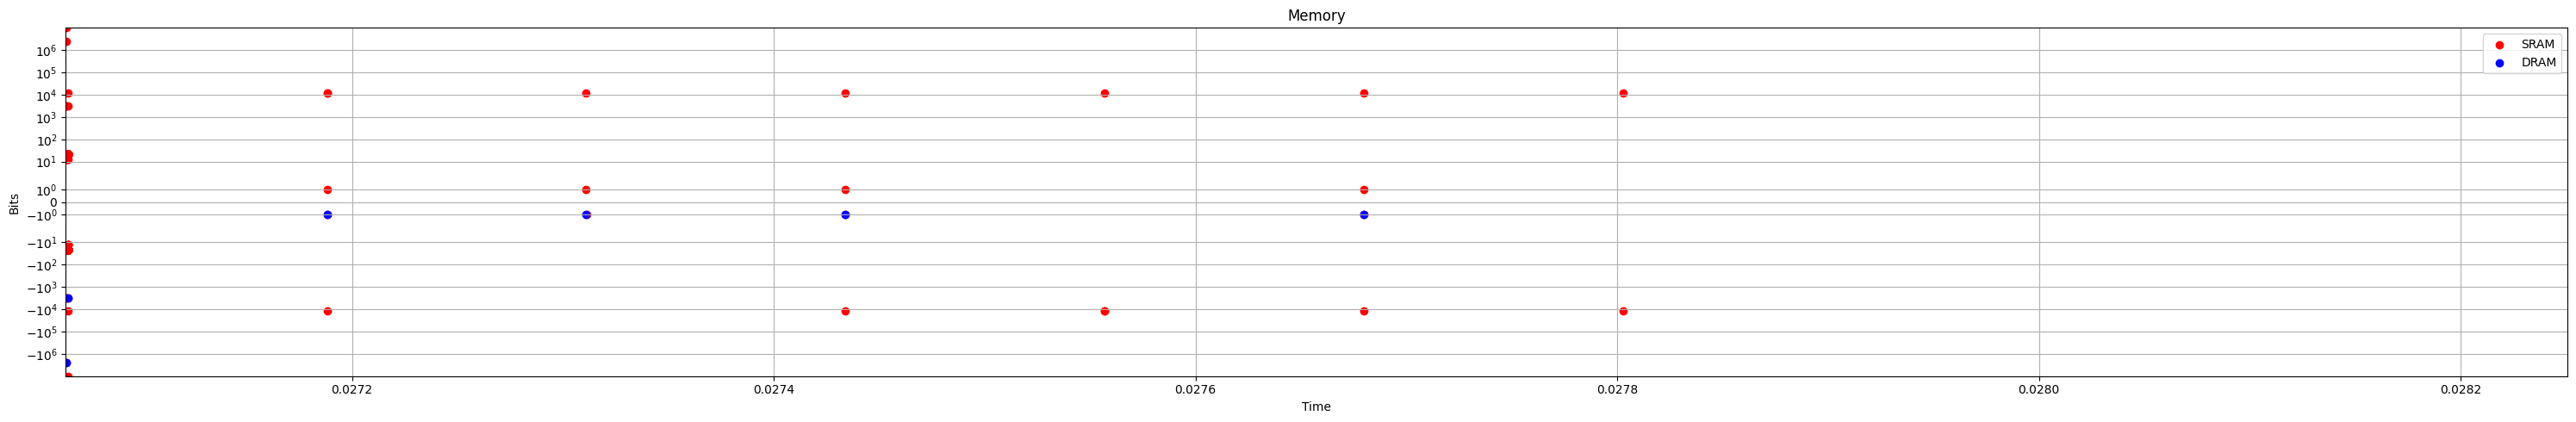

(30817, 4)


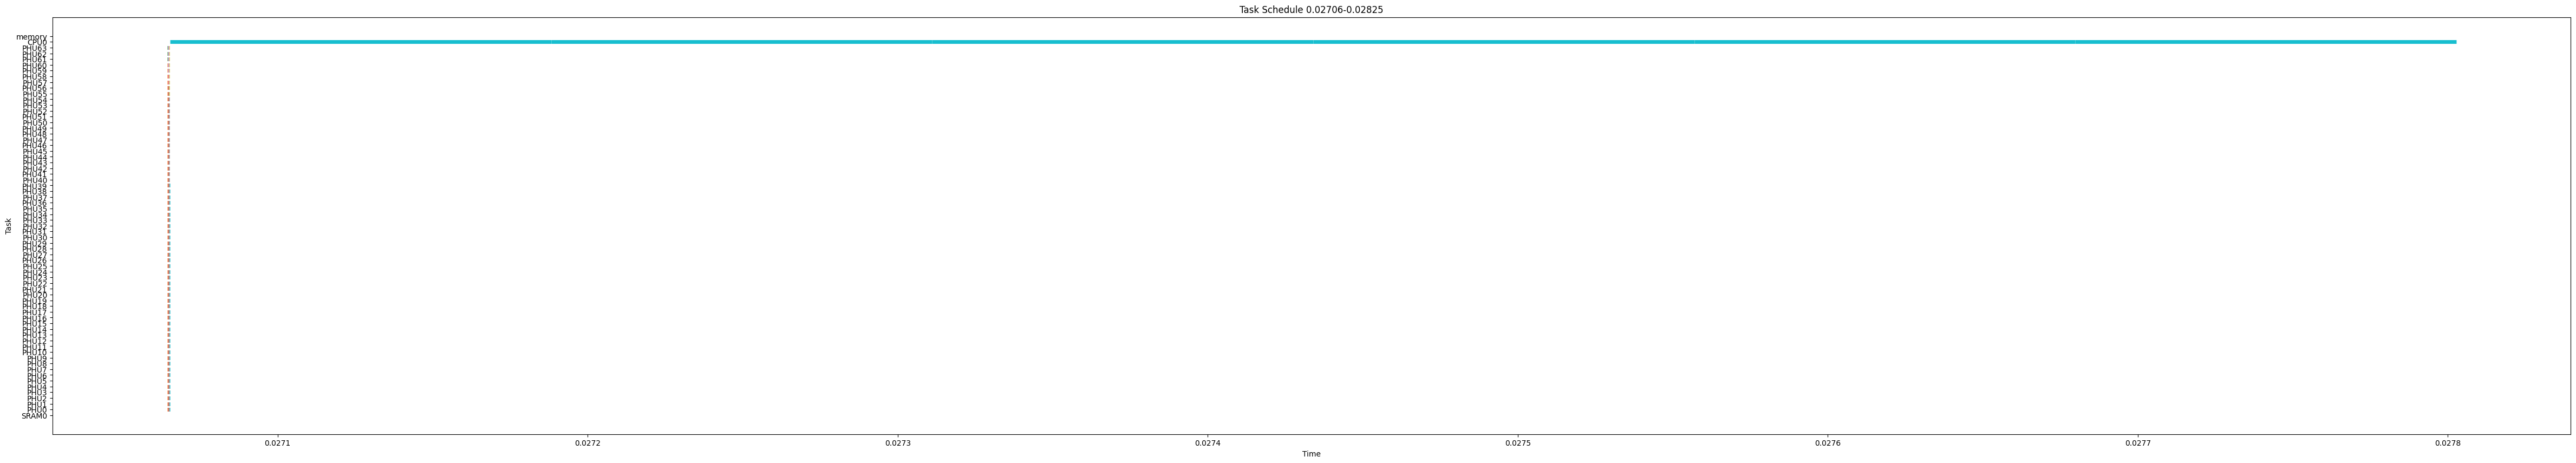

0.028602574000000127 - 0.02869481400000013


ValueError: min() iterable argument is empty

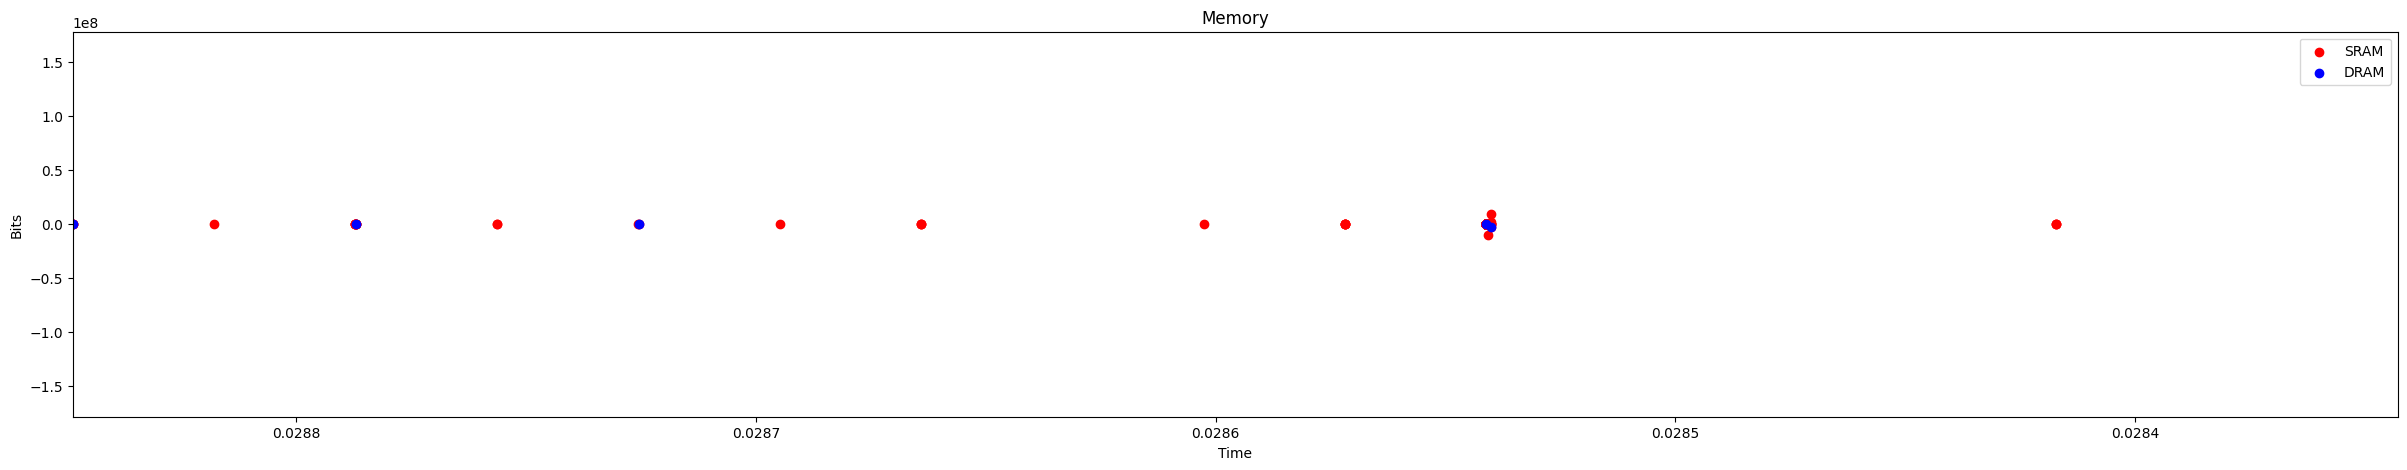

In [23]:
# PLOT EACH SUBSECTION
for i in range(len(break_points)-1):
    print(f'{break_points[i]} - {break_points[i+1]}')

    # plot_time_data(delta_dram, delta_sram, x_limit = (break_points[i], break_points[i+1]),log=True)
    # gv.make_schedule_diagram(scheduled_flat_graph, xlim_start=break_points[i], xlim_end=break_points[i+1])
    # subplot_time_data(delta_dram, delta_sram, x_limit = (break_points[i], break_points[i+1]),log=True)

    plot_time_data(delta_dram, delta_sram, x_limit = (break_points[i] + 0.000246, break_points[i+1] - 0.000352), log=True)
    gv.make_schedule_diagram(scheduled_flat_graph, xlim_start=break_points[i] + 0.000246, xlim_end=break_points[i+1] - 0.000352)
    # subplot_time_data(delta_dram, delta_sram, x_limit = (break_points[i] + 0.000246, break_points[i+1] - 0.000352), log=True)

    # plot_time_data(dram, sram, x_limit = (break_points[i], break_points[i+1]),log=True)
    # plot_time_data(dram, sram, x_limit = (break_points[i] + 0.000246, break_points[i+1] - 0.000352))